In [107]:
%reload_ext autoreload
%autoreload 2

import sys
import os

import numpy as np
import bloscpack as bp
%matplotlib inline

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from metadata import *
from data_manager import *

from registration_utilities import *
from annotation_utilities import *
from vis3d_utilities import *

In [108]:
atlas_name = 'atlasV7'

In [109]:
fixed_brain_name = 'MD589'
moving_brain_names = ['MD585', 'MD594']

In [110]:
resolution = '10.0um'
resolution_um = convert_resolution_string_to_um(resolution)

# Compute mean positions

In [111]:
# temp: convert bbox to origin

# for name_s in all_known_structures_sided:
#     try:
#         in_fp = '/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume/score_volumes/MD585_10.0um_annotationAsScoreVolume_%s_bbox_wrt_wholebrain.txt' % name_s
#         bbox = np.loadtxt(in_fp)
#         out_fp = '/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume/score_volumes/MD585_10.0um_annotationAsScoreVolume_%s_origin_wrt_wholebrain.txt' % name_s
#         np.savetxt(out_fp, bbox[[0,2,4]])

#         upload_to_s3(out_fp)
#     except:
#         pass

## Compute instance centroids

In [112]:
structure_centroids_all_brains_um_wrt_fixed = []

fixed_brain_spec = {'name': fixed_brain_name, 'vol_type': 'annotationAsScore', 'resolution': resolution}

fixed_brain = \
DataManager.load_original_volume_all_known_structures_v3(\
stack_spec=fixed_brain_spec, in_bbox_wrt='wholebrain', common_shape=False)

fixed_brain_structure_centroids = get_centroid_3d(fixed_brain)
fixed_brain_structure_centroids_um = {s: c * resolution_um for s, c in fixed_brain_structure_centroids.iteritems()}

structure_centroids_all_brains_um_wrt_fixed.append(fixed_brain_structure_centroids_um)


for brain_m in moving_brain_names:

    moving_brain_spec = {'name': brain_m, 'vol_type': 'annotationAsScore', 'resolution': resolution}
    
    moving_brain = \
    DataManager.load_original_volume_all_known_structures_v3(\
    stack_spec=moving_brain_spec, in_bbox_wrt='wholebrain', common_shape=False)

    alignment_spec = dict(stack_m=moving_brain_spec, stack_f=fixed_brain_spec, warp_setting=109)

    moving_brain_structure_centroids_input_resol = get_centroid_3d(moving_brain)

    # Load registration.
    
    transform_parameters_moving_brain_to_fixed_brain = DataManager.load_alignment_results_v3(alignment_spec=alignment_spec, what='parameters')
    
    # Transform moving brains into alignment with the fixed brain.
    
    transformed_moving_brain_structure_centroids_input_resol_wrt_fixed = \
    dict(zip(moving_brain_structure_centroids_input_resol.keys(),
             transform_points(pts=moving_brain_structure_centroids_input_resol.values(), 
                            transform=transform_parameters_moving_brain_to_fixed_brain)))
    
    transformed_moving_brain_structure_centroids_um_wrt_fixed = \
     {s: c * resolution_um for s, c in transformed_moving_brain_structure_centroids_input_resol_wrt_fixed.iteritems()}
        
    structure_centroids_all_brains_um_wrt_fixed.append(transformed_moving_brain_structure_centroids_um_wrt_fixed)

Prior structure/index map not found. Generating a new one.


loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cro

Prior structure/index map not found. Generating a new one.


loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cro

rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume/score_volumes/MD585_10.0um_annotationAsScoreVolume_Sp5C_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume/score_volumes"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume/score_volumes/MD585_10.0um_annotationAsScoreVolume_Sp5C_R.bp" "/home/yuncong/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume/score_volumes/MD585_10.0um_annotationAsScoreVolume_Sp5C_R.bp"
return code: 0
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume/score_volumes/MD585_10.0um_annotationAsScoreVolume_Sp5C_R_origin_wrt_wholebrain.txt" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume/score_volumes"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume/score_volumes/MD585_10.0um_annotationAsScoreVolume_Sp5C_R_origin_wrt_wholeb

loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um


rm -rf "/home/yuncong/CSHL_registration_parameters/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_parameters.json" && mkdir -p "/home/yuncong/CSHL_registration_parameters/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_parameters.json" "/home/yuncong/CSHL_registration_parameters/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_parameters.json"
return code: 0
Prior structure/index map not found. Generating a new one.


loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cro

rm -rf "/home/yuncong/CSHL_registration_parameters/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_parameters.json" && mkdir -p "/home/yuncong/CSHL_registration_parameters/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_parameters.json" "/home/yuncong/CSHL_registration_parameters/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_parameters.json"
return code: 0


In [113]:
structure_centroids_all_brains_um_grouped_by_structure_wrt_fixed = defaultdict(list)
for sc in structure_centroids_all_brains_um_wrt_fixed:
    for k, c in sc.iteritems():
        structure_centroids_all_brains_um_grouped_by_structure_wrt_fixed[k].append(c)
structure_centroids_all_brains_um_grouped_by_structure_wrt_fixed.default_factory = None

## Compute standard centroids

In [114]:
nominal_centroids_wrt_canonicalAtlasSpace_um, \
instance_centroids_wrt_canonicalAtlasSpace_um, \
canonical_center_wrt_fixed_um, \
canonical_normal, \
transform_matrix_to_canonicalAtlasSpace_um = \
average_location(structure_centroids_all_brains_um_grouped_by_structure_wrt_fixed)

Mid-sagittal plane normal vector = [ 0.03562165 -0.10621225  0.99370522] @ Mid-sagittal plane anchor wrt fixed wholebrain = [11872.02567334  5646.62023176  4660.11851169]
Transform matrix to canonical atlas space =
[[ 9.99363659e-01  1.89736208e-03 -3.56216528e-02 -1.17091836e+04]
 [ 1.89736208e-03  9.94342680e-01  1.06212254e-01 -6.13216272e+03]
 [ 3.56216528e-02 -1.06212254e-01  9.93706339e-01 -4.45395022e+03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Angular deviation of the mid sagittal plane normal around y axis (degree) = 6.4321497939829575


In [18]:
# nominal_centroids_wrt_canonicalAtlasSpace_um, \
# instance_centroids_wrt_canonicalAtlasSpace_um, \
# canonical_center_wrt_fixed_um, \
# canonical_normal, \
# transform_matrix_to_canonicalAtlasSpace_um = \
# average_location(structure_centroids_all_brains_um_grouped_by_structure_wrt_fixed)

Mid-sagittal plane normal vector = [ 0.03040658 -0.0925051   0.99524783] @ Mid-sagittal plane anchor wrt fixed wholebrain = [ 11865.12723465   5640.31895328   4664.48972151]
Transform matrix to canonical atlas space =
[[  9.99536714e-01   1.40944186e-03  -3.04065760e-02  -1.17257488e+04]
 [  1.40944186e-03   9.95712093e-01   9.25051030e-02  -6.06434610e+03]
 [  3.04065760e-02  -9.25051030e-02   9.95248807e-01  -4.48134744e+03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
Angular deviation of the mid sagittal plane normal around y axis (degree) = 5.58799081745


No handlers could be found for logger "matplotlib.legend"


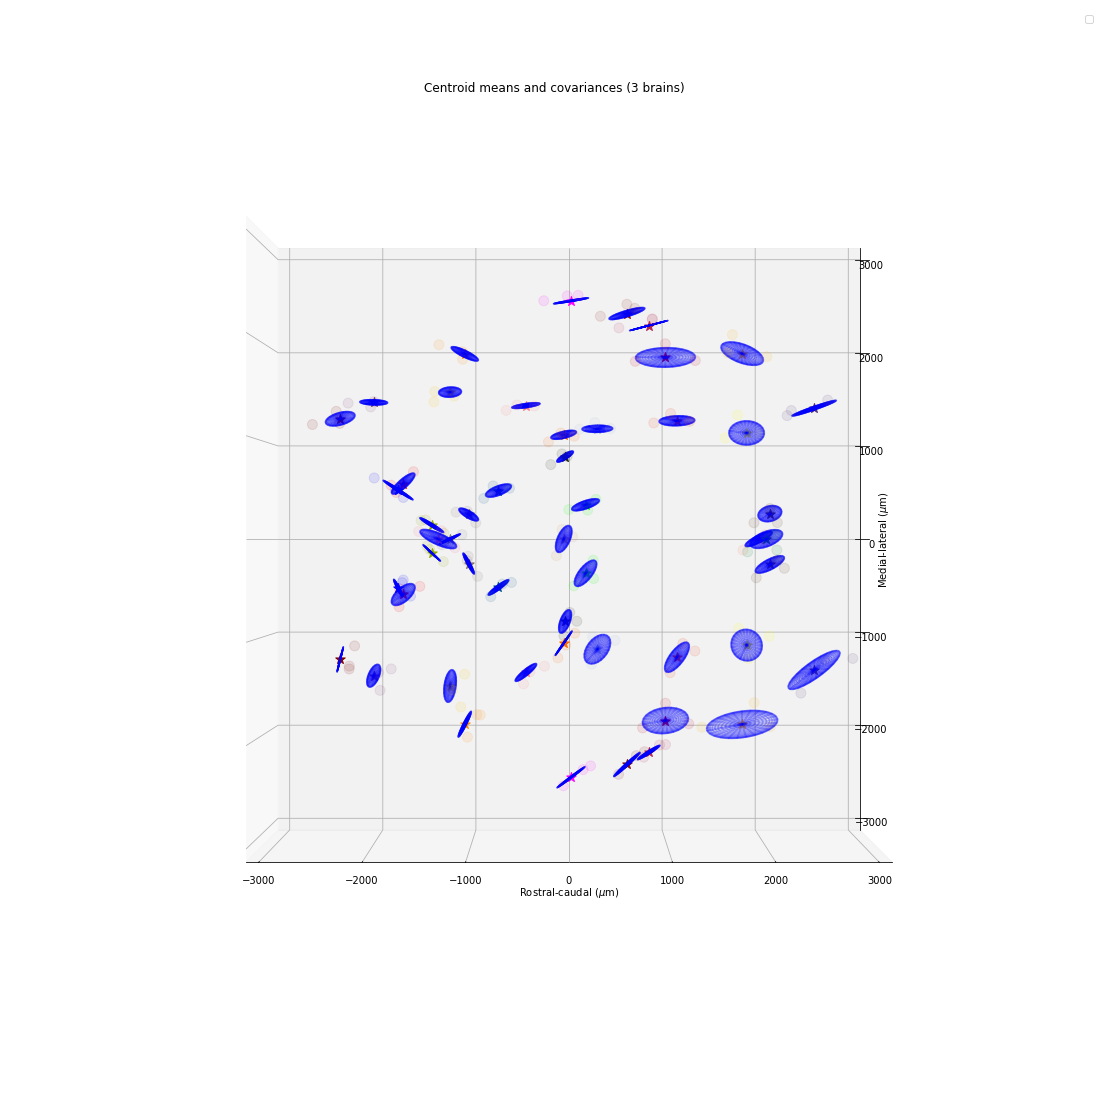

In [115]:
# Unit in microns, center at (0,0,0)

plot_centroid_means_and_covars_3d(instance_centroids=instance_centroids_wrt_canonicalAtlasSpace_um,
                                 nominal_locations=nominal_centroids_wrt_canonicalAtlasSpace_um,
                                 canonical_centroid=(0,0,0),
                                  show_canonical_centroid=False,
                                  canonical_normal=[0,0,1],
                                 colors={name_s: np.array(name_unsided_to_color[convert_to_original_name(name_s)])/255.
                                        for name_s in instance_centroids_wrt_canonicalAtlasSpace_um.keys()},
                                 xlim=[-3000, 3000],
                                 ylim=[-3000, 3000],
                                 zlim=[-3000, 3000],
                                 xlabel='Rostral-caudal ($\mu$m)',
                                 ylabel='',
                                 zlabel='Medial-lateral ($\mu$m)',
                                 title='Centroid means and covariances (3 brains)')

In [116]:
save_data(nominal_centroids_wrt_canonicalAtlasSpace_um, 
          DataManager.get_structure_mean_positions_filepath(atlas_name=atlas_name, resolution='1um'))

aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_1um_meanPositions.pkl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_1um_meanPositions.pkl"
return code: 0


In [117]:
save_data(canonical_center_wrt_fixed_um, 
          DataManager.get_atlas_canonical_centroid_filepath(atlas_name=atlas_name))

aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_canonicalCentroid_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_canonicalCentroid_wrt_fixedWholebrain.txt"
return code: 0


# Compute mean shapes

In [14]:
from aligner_v3 import Aligner

In [15]:
# Note that all shapes have voxel resolution matching input resolution (10.0 micron).

for name_u in all_known_structures:
    
    print name_u

    # Load instance volumes.
    
    instance_volumes = []
    instance_source = []
    
    if name_u in paired_structures:
        left_name = convert_to_left_name(name_u)
        right_name = convert_to_right_name(name_u)
    else:
        left_name = name_u
        right_name = name_u
            
    for brain_name in [fixed_brain_name] + moving_brain_names:
        
        brain_spec = {'name': brain_name, 'vol_type': 'annotationAsScore', 'resolution': resolution}

        try:
            right_instance_vol, _ = DataManager.load_original_volume_v2(stack_spec=brain_spec, 
                                                                     structure=right_name, 
                                                                    return_origin_instead_of_bbox=True,
                                                                    crop_to_minimal=True)
            instance_volumes.append(right_instance_vol) # if right, do not mirror
            instance_source.append((brain_name, 'R'))
        except Exception as e:
            continue

        try:
            left_instance_vol, _ = DataManager.load_original_volume_v2(stack_spec=brain_spec, 
                                                                     structure=left_name, 
                                                                    return_origin_instead_of_bbox=True,
                                                                    crop_to_minimal=True)
            instance_volumes.append(left_instance_vol[..., ::-1]) # if left, mirror
            instance_source.append((brain_name, 'L'))
        except:
            continue
            
    # Use the first instance as registration target.
    # Register every other instance to the first instance.
    
    template_instance_volume = instance_volumes[0]    
    template_instance_centroid_wrt_templateOrigin = get_centroid_3d(template_instance_volume).astype(np.int16)
    template_instance_wrt_templateCentroid = (template_instance_volume, - template_instance_centroid_wrt_templateOrigin)

    aligned_moving_instance_wrt_templateCentroid_all_instances = []
    
    for i in range(1, len(instance_volumes)):
        
        print 'Registering %s instance %d to instance 0' % (name_u, i)
        
        # Compute transform.

        moving_instance_volume = instance_volumes[i]

        aligner = Aligner({0: template_instance_wrt_templateCentroid}, 
                          {0: (moving_instance_volume, np.array((0,0,0)))}, 
                          labelIndexMap_m2f={0:0},
                         verbose=False)
        aligner.set_centroid(centroid_m='structure_centroid', centroid_f='structure_centroid')
        aligner.compute_gradient(smooth_first=True)

        lr = 1.
        _, _ = aligner.optimize(tf_type='rigid', 
                             history_len=100, 
                            max_iter_num=100 if name_u in ['SC', 'IC'] else 1000,
                             grad_computation_sample_number=None,
                                full_lr=np.array([lr,lr,lr,0.1,0.1,0.1]),
                                terminate_thresh_trans=.01
                               )
        
#         plt.figure();
#         plt.plot(aligner.scores);
#         plt.show();
        
        DataManager.save_alignment_results_v3(aligner=aligner, 
                                              select_best='max_value',
                          alignment_spec=dict(warp_setting=108, 
                                              stack_f=dict(name='%s_instance0' % name_u, vol_type='annotationAsScore'),
                                             stack_m=dict(name='%s_instance%d' % (name_u, i), vol_type='annotationAsScore')),
                                     reg_root_dir=os.path.join(MESH_ROOTDIR, atlas_name, 'mean_shapes', 'instance_registration'))        
        
        # Transform instances.

        T = convert_transform_forms(aligner=aligner, out_form=(3,4), select_best='max_value')
        
        aligned_moving_instance_volume, aligned_moving_instance_origin_wrt_templateCentroid = \
        transform_volume_v4(volume=(moving_instance_volume, (0,0,0)), transform=T,
                            return_origin_instead_of_bbox=True)

        aligned_moving_instance_wrt_templateCentroid = (aligned_moving_instance_volume, aligned_moving_instance_origin_wrt_templateCentroid)        
        aligned_moving_instance_wrt_templateCentroid_all_instances.append(aligned_moving_instance_wrt_templateCentroid)

    # Generate meshes for each instance.
    
    instance_mesh_wrt_templateCentroid_all_instances = [
        volume_to_polydata(volume=(v,o), num_simplify_iter=3, smooth=True)
        for v, o in 
        [template_instance_wrt_templateCentroid] + aligned_moving_instance_wrt_templateCentroid_all_instances]
    
#     launch_vtk([actor_mesh(mesh, wireframe=True, color=np.array(high_contrast_colors[i+1])/255., opacity=1, wireframe_linewidth=3) 
#         for i, mesh in enumerate(instance_mesh_wrt_templateCentroid_all_instances)], 
#       background_color=(1,1,1))

    # Save meshes.
    
    for i, m in enumerate(instance_mesh_wrt_templateCentroid_all_instances):
        save_data(m, DataManager.get_instance_mesh_filepath(atlas_name=atlas_name, structure=name_u, 
                                                    resolution='10um', index=i))
        
    save_data(instance_source, DataManager.get_instance_sources_filepath(atlas_name=atlas_name, structure=name_u))

    # Compute average shape.
    
    if name_u == 'IC' or name_u == 'SC':
        # IC and SC boundaries are particularly jagged, so do a larger value smoothing.
        sigma = 5.
    else:
        sigma = 2.

    mean_shape_wrt_templateCentroid = \
        average_shape(volume_origin_list=[template_instance_wrt_templateCentroid] + \
                      aligned_moving_instance_wrt_templateCentroid_all_instances,
                      force_symmetric=(name_u in singular_structures), 
                      sigma=sigma,
                     )
        
    for surface_level in np.arange(0.1, 1.1, .1):
        print "level =", surface_level, ', volume =', \
        np.count_nonzero(mean_shape_wrt_templateCentroid[0] > surface_level) *  resolution_um ** 3 / 1e9, "mm^3"
        
    # Generate meshes for mean shape.
        
    mean_shape_isosurface_polydata_all_levels = \
    {surface_level:         
        volume_to_polydata(volume=(mean_shape_wrt_templateCentroid[0] >= surface_level, 
                                   mean_shape_wrt_templateCentroid[1]), 
                             num_simplify_iter=3, smooth=True)
    for surface_level in np.arange(0.1, 1.1, .1)}
            
    # Identify the surrouding area as additional structure.
    
    wall_level = .5
    surround_distance_um = 200.
        
    surround_wrt_stdShapeCentroid = \
    get_surround_volume_v3(volume=mean_shape_wrt_templateCentroid,                           
                           wall_level=wall_level, 
                           distance=surround_distance_um / resolution_um, 
                           prob=True, 
                           return_origin_instead_of_bbox=True, 
                           padding=5)

    # Generate meshes for surrouding area.
        
    surround_isosurface_polydata_all_levels = \
    {surface_level:         
        volume_to_polydata(volume=(surround_wrt_stdShapeCentroid[0] >= surface_level,
                                   surround_wrt_stdShapeCentroid[1]), 
                             num_simplify_iter=3, smooth=True)
    for surface_level in np.arange(0.1, 1.1, .1)}
    
    
    # Save mean shape.

    save_data(mean_shape_wrt_templateCentroid[0], 
                   DataManager.get_mean_shape_filepath(atlas_name=atlas_name, structure=name_u, 
                                                       what='volume', resolution=resolution))

    save_data(mean_shape_wrt_templateCentroid[1], 
                   DataManager.get_mean_shape_filepath(atlas_name=atlas_name, structure=name_u, 
                                                       what='origin_wrt_meanShapeCentroid', resolution=resolution))

    for level in np.arange(0.1, 1.1, .1):
        save_data(mean_shape_isosurface_polydata_all_levels[level], 
                       DataManager.get_mean_shape_filepath(atlas_name=atlas_name, structure=name_u, 
                                                           what='mesh', resolution=resolution, level=level))

    surround_name = convert_to_surround_name(name_u, margin=str(int(surround_distance_um))+'um')

    save_data(surround_wrt_stdShapeCentroid[0], 
                   DataManager.get_mean_shape_filepath(atlas_name=atlas_name, structure=surround_name, 
                                                       what='volume', resolution=resolution))

    save_data(surround_wrt_stdShapeCentroid[1], 
                   DataManager.get_mean_shape_filepath(atlas_name=atlas_name, structure=surround_name, 
                                                       what='origin_wrt_meanShapeCentroid', resolution=resolution))

    for level in np.arange(0.1, 1.1, .1):
        save_data(surround_isosurface_polydata_all_levels[level], 
                       DataManager.get_mean_shape_filepath(atlas_name=atlas_name, structure=surround_name, 
                                                           what='mesh', resolution=resolution, level=level))

5N
Registering 5N instance 1 to instance 0


Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 29.63803623  41.75503797  20.04490043], centroid_f: [ 0.76469797  0.34528704  0.29166346]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/5N_instance1/5N_instance1_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume/5N_instance1_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/5N_instance1/5N_instance1_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume/5N_instance1_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/5N_instance1/5N_instance1_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume/5N_instance1_annotationAsScoreVolume_

Registering 5N instance 2 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/5N_instance2/5N_instance2_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume/5N_instance2_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/5N_instance2/5N_instance2_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume/5N_instance2_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/5N_instance2/5N_instance2_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume/5N_instance2_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/5N_instance2/5N_instance2_annotationAsScoreVolume_warp108_5N_instance0_annotationAs

Registering 5N instance 3 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/5N_instance3/5N_instance3_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume/5N_instance3_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/5N_instance3/5N_instance3_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume/5N_instance3_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/5N_instance3/5N_instance3_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume/5N_instance3_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/5N_instance3/5N_instance3_annotationAsScoreVolume_warp108_5N_instance0_annotationAs

Registering 5N instance 4 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/5N_instance4/5N_instance4_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume/5N_instance4_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/5N_instance4/5N_instance4_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume/5N_instance4_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/5N_instance4/5N_instance4_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume/5N_instance4_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/5N_instance4/5N_instance4_annotationAsScoreVolume_warp108_5N_instance0_annotationAs

Registering 5N instance 5 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/5N_instance5/5N_instance5_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume/5N_instance5_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/5N_instance5/5N_instance5_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume/5N_instance5_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/5N_instance5/5N_instance5_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume/5N_instance5_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/5N_instance5/5N_instance5_annotationAsScoreVolume_warp108_5N_instance0_annotationAs

level = 0.1 , volume = 0.132938 mm^3
level = 0.2 , volume = 0.111095 mm^3
level = 0.3 , volume = 0.097284 mm^3
level = 0.4 , volume = 0.086648 mm^3
level = 0.5 , volume = 0.077693 mm^3
level = 0.6 , volume = 0.069522 mm^3
level = 0.7 , volume = 0.061531 mm^3
level = 0.8 , volume = 0.052871 mm^3
level = 0.9 , volume = 0.041914 mm^3
level = 1.0 , volume = 0.00012 mm^3


simplify 0 @ 18295: 0.17 seconds
simplify 1 @ 3660: 0.16 seconds
simplify 2 @ 733: 0.03 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 15780: 0.13 seconds
simplify 1 @ 3157: 0.13 seconds
simplify 2 @ 633: 0.03 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 14470: 0.12 seconds
simplify 1 @ 2895: 0.12 seconds
simplify 2 @ 580: 0.03 seconds
marching cube: 0.06 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13526: 0.11 seconds
simplify 1 @ 2706: 0.11 seconds
simplify 2 @ 542: 0.02 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 12651: 0.11 seconds
simplify 1 @ 2531: 0.10 seconds
simplify 2 @ 507: 0.02 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11888: 0.09 seconds
simplify 1 @ 2379: 0.10 seconds
simplify 2 @ 477: 0.02 seconds
marching cube: 0.07 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11084: 0.09 seconds
simplify 1 @ 2218: 0.08 seconds
simpl

return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_5N_surround_200um_meanShape_mesh_level0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_5N_surround_200um_meanShape_mesh_level0.9.stl"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_5N_surround_200um_meanShape_mesh_level1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_5N_surround_200um_meanShape_mesh_level1.0.stl"
return code: 0


6N
Registering 6N instance 1 to instance 0


Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 10.58515091  11.81780128   9.03965631], centroid_f: [ 0.0758209   0.93373134  0.13552239]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/6N_instance1/6N_instance1_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume/6N_instance1_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/6N_instance1/6N_instance1_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume/6N_instance1_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/6N_instance1/6N_instance1_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume/6N_instance1_annotationAsScoreVolume_

Registering 6N instance 2 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/6N_instance2/6N_instance2_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume/6N_instance2_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/6N_instance2/6N_instance2_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume/6N_instance2_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/6N_instance2/6N_instance2_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume/6N_instance2_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/6N_instance2/6N_instance2_annotationAsScoreVolume_warp108_6N_instance0_annotationAs

Registering 6N instance 3 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/6N_instance3/6N_instance3_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume/6N_instance3_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/6N_instance3/6N_instance3_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume/6N_instance3_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/6N_instance3/6N_instance3_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume/6N_instance3_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/6N_instance3/6N_instance3_annotationAsScoreVolume_warp108_6N_instance0_annotationAs

Registering 6N instance 4 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/6N_instance4/6N_instance4_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume/6N_instance4_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/6N_instance4/6N_instance4_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume/6N_instance4_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/6N_instance4/6N_instance4_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume/6N_instance4_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/6N_instance4/6N_instance4_annotationAsScoreVolume_warp108_6N_instance0_annotationAs

Registering 6N instance 5 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/6N_instance5/6N_instance5_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume/6N_instance5_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/6N_instance5/6N_instance5_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume/6N_instance5_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/6N_instance5/6N_instance5_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume/6N_instance5_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/6N_instance5/6N_instance5_annotationAsScoreVolume_warp108_6N_instance0_annotationAs

level = 0.1 , volume = 0.007021 mm^3
level = 0.2 , volume = 0.005129 mm^3
level = 0.3 , volume = 0.003955 mm^3
level = 0.4 , volume = 0.003115 mm^3
level = 0.5 , volume = 0.002468 mm^3
level = 0.6 , volume = 0.001892 mm^3
level = 0.7 , volume = 0.00137 mm^3
level = 0.8 , volume = 0.000902 mm^3
level = 0.9 , volume = 0.000439 mm^3
level = 1.0 , volume = 0.0 mm^3


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 618: 0.00 seconds
simplify 1 @ 125: 0.00 seconds
marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 358: 0.00 seconds
simplify 1 @ 73: 0.00 seconds
marching cube: 0.00 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds
marching cube: 0.06 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 14255: 0.10 seconds
simplify 1 @ 2854: 0.11 seconds
simplify 2 @ 574: 0.02 seconds
marching cube: 0.06 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 14255: 0.10 seconds
simplify 1 @ 2854: 0.10 seconds
simplify 2 @ 574: 0.02 seconds
marching cube: 0.06 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 14255: 0.10 seconds
simplify 1 @ 2854: 0.10 seconds
simplify 2 @ 574: 0.02 seconds
marching cube: 0.06 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 14255: 0.10 seconds
simplify 1 @ 2854: 0.10 seconds
simplify 2 @ 574:

7N
Registering 7N instance 1 to instance 0


Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 45.22839224  26.51537425  46.47644335], centroid_f: [ 0.44528528  0.04330523  0.41486203]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/7N_instance1/7N_instance1_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume/7N_instance1_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/7N_instance1/7N_instance1_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume/7N_instance1_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/7N_instance1/7N_instance1_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume/7N_instance1_annotationAsScoreVolume_

Registering 7N instance 2 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/7N_instance2/7N_instance2_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume/7N_instance2_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/7N_instance2/7N_instance2_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume/7N_instance2_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/7N_instance2/7N_instance2_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume/7N_instance2_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/7N_instance2/7N_instance2_annotationAsScoreVolume_warp108_7N_instance0_annotationAs

Registering 7N instance 3 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/7N_instance3/7N_instance3_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume/7N_instance3_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/7N_instance3/7N_instance3_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume/7N_instance3_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/7N_instance3/7N_instance3_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume/7N_instance3_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/7N_instance3/7N_instance3_annotationAsScoreVolume_warp108_7N_instance0_annotationAs

Registering 7N instance 4 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/7N_instance4/7N_instance4_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume/7N_instance4_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/7N_instance4/7N_instance4_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume/7N_instance4_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/7N_instance4/7N_instance4_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume/7N_instance4_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/7N_instance4/7N_instance4_annotationAsScoreVolume_warp108_7N_instance0_annotationAs

Registering 7N instance 5 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/7N_instance5/7N_instance5_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume/7N_instance5_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/7N_instance5/7N_instance5_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume/7N_instance5_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/7N_instance5/7N_instance5_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume/7N_instance5_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/7N_instance5/7N_instance5_annotationAsScoreVolume_warp108_7N_instance0_annotationAs

level = 0.1 , volume = 0.242143 mm^3
level = 0.2 , volume = 0.212579 mm^3
level = 0.3 , volume = 0.193785 mm^3
level = 0.4 , volume = 0.178837 mm^3
level = 0.5 , volume = 0.165543 mm^3
level = 0.6 , volume = 0.152835 mm^3
level = 0.7 , volume = 0.139814 mm^3
level = 0.8 , volume = 0.125435 mm^3
level = 0.9 , volume = 0.106788 mm^3
level = 1.0 , volume = 0.006906 mm^3


simplify 0 @ 27090: 0.22 seconds
simplify 1 @ 5419: 0.23 seconds
simplify 2 @ 1085: 0.05 seconds
marching cube: 0.09 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 24738: 0.20 seconds
simplify 1 @ 4949: 0.21 seconds
simplify 2 @ 991: 0.05 seconds
marching cube: 0.09 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 23334: 0.19 seconds
simplify 1 @ 4668: 0.19 seconds
simplify 2 @ 935: 0.04 seconds
marching cube: 0.09 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 22304: 0.18 seconds
simplify 1 @ 4462: 0.20 seconds
simplify 2 @ 894: 0.04 seconds
marching cube: 0.10 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 21450: 0.18 seconds
simplify 1 @ 4291: 0.19 seconds
simplify 2 @ 859: 0.04 seconds
marching cube: 0.10 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 20547: 0.18 seconds
simplify 1 @ 4111: 0.19 seconds
simplify 2 @ 823: 0.04 seconds
marching cube: 0.10 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 19759: 0.17 seconds
simplify 1 @ 3953: 0.17 seconds
simp

return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_7N_surround_200um_meanShape_mesh_level0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_7N_surround_200um_meanShape_mesh_level0.9.stl"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_7N_surround_200um_meanShape_mesh_level1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_7N_surround_200um_meanShape_mesh_level1.0.stl"
return code: 0


7n
Registering 7n instance 1 to instance 0


Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 55.51404195  57.75442588  63.20068255], centroid_f: [ 0.74210024  0.05175225  0.11051968]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/7n_instance1/7n_instance1_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume/7n_instance1_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/7n_instance1/7n_instance1_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume/7n_instance1_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/7n_instance1/7n_instance1_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume/7n_instance1_annotationAsScoreVolume_

Registering 7n instance 2 to instance 0


indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/7n_instance2/7n_instance2_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume/7n_instance2_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/7n_instance2/7n_instance2_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume/7n_instance2_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/7n_instance2/7n_instance2_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume/7n_instance2_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/7n_instance2/7n_instance2_annotationAsScoreVolume_warp108_7n_in

Registering 7n instance 3 to instance 0


indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/7n_instance3/7n_instance3_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume/7n_instance3_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/7n_instance3/7n_instance3_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume/7n_instance3_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/7n_instance3/7n_instance3_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume/7n_instance3_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/7n_instance3/7n_instance3_annotationAsScoreVolume_warp108_7n_in

Registering 7n instance 4 to instance 0


indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/7n_instance4/7n_instance4_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume/7n_instance4_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/7n_instance4/7n_instance4_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume/7n_instance4_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/7n_instance4/7n_instance4_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume/7n_instance4_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/7n_instance4/7n_instance4_annotationAsScoreVolume_warp108_7n_in

Registering 7n instance 5 to instance 0


indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/7n_instance5/7n_instance5_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume/7n_instance5_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/7n_instance5/7n_instance5_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume/7n_instance5_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/7n_instance5/7n_instance5_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume/7n_instance5_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/7n_instance5/7n_instance5_annotationAsScoreVolume_warp108_7n_in

level = 0.1 , volume = 0.112681 mm^3
level = 0.2 , volume = 0.092262 mm^3
level = 0.3 , volume = 0.079425 mm^3
level = 0.4 , volume = 0.069427 mm^3
level = 0.5 , volume = 0.060868 mm^3
level = 0.6 , volume = 0.053033 mm^3
level = 0.7 , volume = 0.045315 mm^3
level = 0.8 , volume = 0.037075 mm^3
level = 0.9 , volume = 0.027354 mm^3
level = 1.0 , volume = 0.0 mm^3


marching cube: 0.20 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 23975: 0.18 seconds
simplify 1 @ 4796: 0.20 seconds
simplify 2 @ 960: 0.04 seconds
marching cube: 0.21 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 21451: 0.15 seconds
simplify 1 @ 4291: 0.17 seconds
simplify 2 @ 859: 0.04 seconds
marching cube: 0.20 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 19786: 0.15 seconds
simplify 1 @ 3958: 0.20 seconds
simplify 2 @ 793: 0.04 seconds
marching cube: 0.26 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 18349: 0.16 seconds
simplify 1 @ 3671: 0.16 seconds
simplify 2 @ 735: 0.03 seconds
marching cube: 0.23 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 17051: 0.13 seconds
simplify 1 @ 3411: 0.15 seconds
simplify 2 @ 683: 0.03 seconds
marching cube: 0.23 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 15923: 0.13 seconds
simplify 1 @ 3186: 0.13 seconds
simplify 2 @ 638: 0.03 seconds
marching cube: 0.23 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 

return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_7n_surround_200um_meanShape_mesh_level0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_7n_surround_200um_meanShape_mesh_level0.9.stl"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_7n_surround_200um_meanShape_mesh_level1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_7n_surround_200um_meanShape_mesh_level1.0.stl"
return code: 0


Amb
Registering Amb instance 1 to instance 0


Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 23.23133605  10.60345162   5.24801241], centroid_f: [ 0.53233621  0.38677059  0.82283548]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Amb_instance1/Amb_instance1_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume/Amb_instance1_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Amb_instance1/Amb_instance1_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume/Amb_instance1_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Amb_instance1/Amb_instance1_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume/Amb_instance1_annotation

Registering Amb instance 2 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Amb_instance2/Amb_instance2_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume/Amb_instance2_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Amb_instance2/Amb_instance2_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume/Amb_instance2_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Amb_instance2/Amb_instance2_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume/Amb_instance2_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Amb_instance2/Amb_instance2_annotationAsScoreVolume_warp108_Amb_inst

Registering Amb instance 3 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Amb_instance3/Amb_instance3_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume/Amb_instance3_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Amb_instance3/Amb_instance3_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume/Amb_instance3_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Amb_instance3/Amb_instance3_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume/Amb_instance3_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Amb_instance3/Amb_instance3_annotationAsScoreVolume_warp108_Amb_inst

Registering Amb instance 4 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Amb_instance4/Amb_instance4_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume/Amb_instance4_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Amb_instance4/Amb_instance4_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume/Amb_instance4_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Amb_instance4/Amb_instance4_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume/Amb_instance4_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Amb_instance4/Amb_instance4_annotationAsScoreVolume_warp108_Amb_inst

Registering Amb instance 5 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Amb_instance5/Amb_instance5_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume/Amb_instance5_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Amb_instance5/Amb_instance5_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume/Amb_instance5_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Amb_instance5/Amb_instance5_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume/Amb_instance5_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Amb_instance5/Amb_instance5_annotationAsScoreVolume_warp108_Amb_inst

level = 0.1 , volume = 0.010241 mm^3
level = 0.2 , volume = 0.007188 mm^3
level = 0.3 , volume = 0.00561 mm^3
level = 0.4 , volume = 0.004403 mm^3
level = 0.5 , volume = 0.003341 mm^3
level = 0.6 , volume = 0.002575 mm^3
level = 0.7 , volume = 0.001836 mm^3
level = 0.8 , volume = 0.001156 mm^3
level = 0.9 , volume = 0.000535 mm^3
level = 1.0 , volume = 0.0 mm^3


simplify 0 @ 1627: 0.02 seconds
simplify 1 @ 327: 0.01 seconds
simplify 2 @ 67: 0.00 seconds
marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1319: 0.01 seconds
simplify 1 @ 265: 0.01 seconds
simplify 2 @ 54: 0.00 seconds
marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1177: 0.01 seconds
simplify 1 @ 237: 0.01 seconds
simplify 2 @ 49: 0.00 seconds
marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 837: 0.01 seconds
simplify 1 @ 169: 0.01 seconds
marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 597: 0.01 seconds
simplify 1 @ 121: 0.00 seconds
marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 316: 0.00 seconds
simplify 1 @ 64: 0.00 seconds
marching cube: 0.01 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds
marching cube: 0.07 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 15548: 0.13 seco

return code: 0


LC
Registering LC instance 1 to instance 0


Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 29.5030576   34.92127138   8.29968142], centroid_f: [ 0.33886183  0.02740613  0.25889389]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/LC_instance1/LC_instance1_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume/LC_instance1_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/LC_instance1/LC_instance1_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume/LC_instance1_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/LC_instance1/LC_instance1_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume/LC_instance1_annotationAsScoreVolume_

Registering LC instance 2 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/LC_instance2/LC_instance2_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume/LC_instance2_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/LC_instance2/LC_instance2_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume/LC_instance2_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/LC_instance2/LC_instance2_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume/LC_instance2_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/LC_instance2/LC_instance2_annotationAsScoreVolume_warp108_LC_instance0_annotationAs

Registering LC instance 3 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/LC_instance3/LC_instance3_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume/LC_instance3_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/LC_instance3/LC_instance3_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume/LC_instance3_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/LC_instance3/LC_instance3_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume/LC_instance3_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/LC_instance3/LC_instance3_annotationAsScoreVolume_warp108_LC_instance0_annotationAs

Registering LC instance 4 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/LC_instance4/LC_instance4_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume/LC_instance4_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/LC_instance4/LC_instance4_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume/LC_instance4_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/LC_instance4/LC_instance4_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume/LC_instance4_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/LC_instance4/LC_instance4_annotationAsScoreVolume_warp108_LC_instance0_annotationAs

Registering LC instance 5 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/LC_instance5/LC_instance5_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume/LC_instance5_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/LC_instance5/LC_instance5_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume/LC_instance5_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/LC_instance5/LC_instance5_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume/LC_instance5_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/LC_instance5/LC_instance5_annotationAsScoreVolume_warp108_LC_instance0_annotationAs

level = 0.1 , volume = 0.049679 mm^3
level = 0.2 , volume = 0.038931 mm^3
level = 0.3 , volume = 0.032134 mm^3
level = 0.4 , volume = 0.027018 mm^3
level = 0.5 , volume = 0.022794 mm^3
level = 0.6 , volume = 0.01891 mm^3
level = 0.7 , volume = 0.015286 mm^3
level = 0.8 , volume = 0.011562 mm^3
level = 0.9 , volume = 0.007481 mm^3
level = 1.0 , volume = 0.0 mm^3


simplify 0 @ 10570: 0.09 seconds
simplify 1 @ 2115: 0.07 seconds
simplify 2 @ 424: 0.02 seconds
marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9329: 0.07 seconds
simplify 1 @ 1867: 0.06 seconds
simplify 2 @ 375: 0.01 seconds
marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8338: 0.06 seconds
simplify 1 @ 1669: 0.05 seconds
simplify 2 @ 335: 0.01 seconds
marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7541: 0.05 seconds
simplify 1 @ 1509: 0.05 seconds
simplify 2 @ 303: 0.01 seconds
marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6925: 0.05 seconds
simplify 1 @ 1386: 0.04 seconds
simplify 2 @ 278: 0.01 seconds
marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6186: 0.04 seconds
simplify 1 @ 1238: 0.04 seconds
simplify 2 @ 249: 0.01 seconds
marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5568: 0.04 seconds
simplify 1 @ 1115: 0.03 seconds
simplify 2 

return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_LC_surround_200um_meanShape_mesh_level0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_LC_surround_200um_meanShape_mesh_level0.9.stl"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_LC_surround_200um_meanShape_mesh_level1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_LC_surround_200um_meanShape_mesh_level1.0.stl"
return code: 0


LRt
Registering LRt instance 1 to instance 0


Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 48.22492861  40.2615068   30.93390937], centroid_f: [ 0.99256715  0.97806839  0.47688944]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/LRt_instance1/LRt_instance1_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume/LRt_instance1_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/LRt_instance1/LRt_instance1_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume/LRt_instance1_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/LRt_instance1/LRt_instance1_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume/LRt_instance1_annotation

Registering LRt instance 2 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/LRt_instance2/LRt_instance2_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume/LRt_instance2_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/LRt_instance2/LRt_instance2_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume/LRt_instance2_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/LRt_instance2/LRt_instance2_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume/LRt_instance2_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/LRt_instance2/LRt_instance2_annotationAsScoreVolume_warp108_LRt_inst

Registering LRt instance 3 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/LRt_instance3/LRt_instance3_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume/LRt_instance3_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/LRt_instance3/LRt_instance3_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume/LRt_instance3_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/LRt_instance3/LRt_instance3_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume/LRt_instance3_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/LRt_instance3/LRt_instance3_annotationAsScoreVolume_warp108_LRt_inst

Registering LRt instance 4 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/LRt_instance4/LRt_instance4_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume/LRt_instance4_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/LRt_instance4/LRt_instance4_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume/LRt_instance4_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/LRt_instance4/LRt_instance4_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume/LRt_instance4_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/LRt_instance4/LRt_instance4_annotationAsScoreVolume_warp108_LRt_inst

Registering LRt instance 5 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/LRt_instance5/LRt_instance5_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume/LRt_instance5_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/LRt_instance5/LRt_instance5_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume/LRt_instance5_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/LRt_instance5/LRt_instance5_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume/LRt_instance5_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/LRt_instance5/LRt_instance5_annotationAsScoreVolume_warp108_LRt_inst

level = 0.1 , volume = 0.193161 mm^3
level = 0.2 , volume = 0.155834 mm^3
level = 0.3 , volume = 0.132713 mm^3
level = 0.4 , volume = 0.114813 mm^3
level = 0.5 , volume = 0.098937 mm^3
level = 0.6 , volume = 0.084288 mm^3
level = 0.7 , volume = 0.069004 mm^3
level = 0.8 , volume = 0.054961 mm^3
level = 0.9 , volume = 0.039874 mm^3
level = 1.0 , volume = 0.0 mm^3


marching cube: 0.14 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 31577: 0.24 seconds
simplify 1 @ 6317: 0.28 seconds
simplify 2 @ 1265: 0.05 seconds
marching cube: 0.13 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 27358: 0.20 seconds
simplify 1 @ 5473: 0.23 seconds
simplify 2 @ 1096: 0.05 seconds
marching cube: 0.13 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 24749: 0.18 seconds
simplify 1 @ 4951: 0.22 seconds
simplify 2 @ 991: 0.05 seconds
marching cube: 0.14 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 22678: 0.18 seconds
simplify 1 @ 4537: 0.20 seconds
simplify 2 @ 909: 0.04 seconds
marching cube: 0.14 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 20673: 0.16 seconds
simplify 1 @ 4136: 0.18 seconds
simplify 2 @ 828: 0.04 seconds
marching cube: 0.14 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 18888: 0.14 seconds
simplify 1 @ 3779: 0.16 seconds
simplify 2 @ 757: 0.03 seconds
marching cube: 0.14 seconds
mesh_to_polydata: 0.02 seconds
simplify 

return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_LRt_surround_200um_meanShape_mesh_level0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_LRt_surround_200um_meanShape_mesh_level0.9.stl"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_LRt_surround_200um_meanShape_mesh_level1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_LRt_surround_200um_meanShape_mesh_level1.0.stl"
return code: 0


Pn
Registering Pn instance 1 to instance 0


Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 37.16249492  58.64997603  38.91111786], centroid_f: [ 0.13630671  0.52273486  0.88550221]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Pn_instance1/Pn_instance1_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume/Pn_instance1_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Pn_instance1/Pn_instance1_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume/Pn_instance1_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Pn_instance1/Pn_instance1_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume/Pn_instance1_annotationAsScoreVolume_

Registering Pn instance 2 to instance 0


indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Pn_instance2/Pn_instance2_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume/Pn_instance2_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Pn_instance2/Pn_instance2_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume/Pn_instance2_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Pn_instance2/Pn_instance2_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume/Pn_instance2_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Pn_instance2/Pn_instance2_annotationAsScoreVolume_warp108_Pn_in

Registering Pn instance 3 to instance 0


indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Pn_instance3/Pn_instance3_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume/Pn_instance3_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Pn_instance3/Pn_instance3_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume/Pn_instance3_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Pn_instance3/Pn_instance3_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume/Pn_instance3_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Pn_instance3/Pn_instance3_annotationAsScoreVolume_warp108_Pn_in

Registering Pn instance 4 to instance 0


indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Pn_instance4/Pn_instance4_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume/Pn_instance4_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Pn_instance4/Pn_instance4_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume/Pn_instance4_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Pn_instance4/Pn_instance4_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume/Pn_instance4_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Pn_instance4/Pn_instance4_annotationAsScoreVolume_warp108_Pn_in

Registering Pn instance 5 to instance 0


indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Pn_instance5/Pn_instance5_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume/Pn_instance5_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Pn_instance5/Pn_instance5_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume/Pn_instance5_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Pn_instance5/Pn_instance5_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume/Pn_instance5_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Pn_instance5/Pn_instance5_annotationAsScoreVolume_warp108_Pn_in

level = 0.1 , volume = 0.391497 mm^3
level = 0.2 , volume = 0.34186 mm^3
level = 0.3 , volume = 0.307198 mm^3
level = 0.4 , volume = 0.278069 mm^3
level = 0.5 , volume = 0.25264 mm^3
level = 0.6 , volume = 0.228449 mm^3
level = 0.7 , volume = 0.203464 mm^3
level = 0.8 , volume = 0.176978 mm^3
level = 0.9 , volume = 0.145912 mm^3
level = 1.0 , volume = 0.006295 mm^3


marching cube: 0.15 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 42754: 0.36 seconds
simplify 1 @ 8552: 0.40 seconds
simplify 2 @ 1712: 0.08 seconds
marching cube: 0.16 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 39403: 0.32 seconds
simplify 1 @ 7882: 0.36 seconds
simplify 2 @ 1578: 0.07 seconds
marching cube: 0.15 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 36672: 0.30 seconds
simplify 1 @ 7336: 0.34 seconds
simplify 2 @ 1468: 0.06 seconds
marching cube: 0.15 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 34379: 0.27 seconds
simplify 1 @ 6877: 0.30 seconds
simplify 2 @ 1377: 0.06 seconds
marching cube: 0.16 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 32280: 0.29 seconds
simplify 1 @ 6457: 0.30 seconds
simplify 2 @ 1293: 0.06 seconds
marching cube: 0.17 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 30342: 0.27 seconds
simplify 1 @ 6070: 0.28 seconds
simplify 2 @ 1215: 0.06 seconds
marching cube: 0.17 seconds
mesh_to_polydata: 0.04 seconds
simpl

return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_Pn_surround_200um_meanShape_mesh_level0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_Pn_surround_200um_meanShape_mesh_level0.9.stl"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_Pn_surround_200um_meanShape_mesh_level1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_Pn_surround_200um_meanShape_mesh_level1.0.stl"
return code: 0


Tz
Registering Tz instance 1 to instance 0


Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 38.87548558  22.35238335  26.20257301], centroid_f: [ 0.22088999  0.18435931  0.26275771]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Tz_instance1/Tz_instance1_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume/Tz_instance1_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Tz_instance1/Tz_instance1_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume/Tz_instance1_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Tz_instance1/Tz_instance1_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume/Tz_instance1_annotationAsScoreVolume_

Registering Tz instance 2 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Tz_instance2/Tz_instance2_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume/Tz_instance2_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Tz_instance2/Tz_instance2_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume/Tz_instance2_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Tz_instance2/Tz_instance2_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume/Tz_instance2_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Tz_instance2/Tz_instance2_annotationAsScoreVolume_warp108_Tz_instance0_annotationAs

Registering Tz instance 3 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Tz_instance3/Tz_instance3_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume/Tz_instance3_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Tz_instance3/Tz_instance3_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume/Tz_instance3_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Tz_instance3/Tz_instance3_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume/Tz_instance3_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Tz_instance3/Tz_instance3_annotationAsScoreVolume_warp108_Tz_instance0_annotationAs

Registering Tz instance 4 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Tz_instance4/Tz_instance4_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume/Tz_instance4_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Tz_instance4/Tz_instance4_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume/Tz_instance4_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Tz_instance4/Tz_instance4_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume/Tz_instance4_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Tz_instance4/Tz_instance4_annotationAsScoreVolume_warp108_Tz_instance0_annotationAs

Registering Tz instance 5 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Tz_instance5/Tz_instance5_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume/Tz_instance5_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Tz_instance5/Tz_instance5_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume/Tz_instance5_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Tz_instance5/Tz_instance5_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume/Tz_instance5_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Tz_instance5/Tz_instance5_annotationAsScoreVolume_warp108_Tz_instance0_annotationAs

level = 0.1 , volume = 0.067323 mm^3
level = 0.2 , volume = 0.055066 mm^3
level = 0.3 , volume = 0.047445 mm^3
level = 0.4 , volume = 0.041541 mm^3
level = 0.5 , volume = 0.036428 mm^3
level = 0.6 , volume = 0.031673 mm^3
level = 0.7 , volume = 0.026928 mm^3
level = 0.8 , volume = 0.021702 mm^3
level = 0.9 , volume = 0.015602 mm^3
level = 1.0 , volume = 0.0 mm^3


simplify 0 @ 12145: 0.11 seconds
simplify 1 @ 2430: 0.09 seconds
simplify 2 @ 487: 0.02 seconds
marching cube: 0.06 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 10639: 0.09 seconds
simplify 1 @ 2129: 0.08 seconds
simplify 2 @ 427: 0.02 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9715: 0.08 seconds
simplify 1 @ 1944: 0.07 seconds
simplify 2 @ 390: 0.02 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9047: 0.08 seconds
simplify 1 @ 1811: 0.06 seconds
simplify 2 @ 363: 0.01 seconds
marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8316: 0.08 seconds
simplify 1 @ 1664: 0.06 seconds
simplify 2 @ 334: 0.01 seconds
marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7789: 0.07 seconds
simplify 1 @ 1559: 0.05 seconds
simplify 2 @ 313: 0.01 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7135: 0.07 seconds
simplify 1 @ 1428: 0.05 seconds
simplify 2

return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_Tz_surround_200um_meanShape_mesh_level0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_Tz_surround_200um_meanShape_mesh_level0.9.stl"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_Tz_surround_200um_meanShape_mesh_level1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_Tz_surround_200um_meanShape_mesh_level1.0.stl"
return code: 0


VLL
Registering VLL instance 1 to instance 0


Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [  47.21556635  117.75526174   43.10694969], centroid_f: [ 0.95560399  0.35702337  0.48305368]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VLL_instance1/VLL_instance1_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume/VLL_instance1_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VLL_instance1/VLL_instance1_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume/VLL_instance1_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VLL_instance1/VLL_instance1_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume/VLL_instance1_annotat

Registering VLL instance 2 to instance 0


indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VLL_instance2/VLL_instance2_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume/VLL_instance2_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VLL_instance2/VLL_instance2_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume/VLL_instance2_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VLL_instance2/VLL_instance2_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume/VLL_instance2_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VLL_instance2/VLL_instance2_annotationAsScoreVol

Registering VLL instance 3 to instance 0


indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VLL_instance3/VLL_instance3_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume/VLL_instance3_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VLL_instance3/VLL_instance3_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume/VLL_instance3_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VLL_instance3/VLL_instance3_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume/VLL_instance3_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VLL_instance3/VLL_instance3_annotationAsScoreVol

Registering VLL instance 4 to instance 0


indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VLL_instance4/VLL_instance4_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume/VLL_instance4_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VLL_instance4/VLL_instance4_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume/VLL_instance4_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VLL_instance4/VLL_instance4_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume/VLL_instance4_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VLL_instance4/VLL_instance4_annotationAsScoreVol

Registering VLL instance 5 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VLL_instance5/VLL_instance5_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume/VLL_instance5_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VLL_instance5/VLL_instance5_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume/VLL_instance5_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VLL_instance5/VLL_instance5_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume/VLL_instance5_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VLL_instance5/VLL_instance5_annotationAsScoreVolume_warp108_VLL_inst

level = 0.1 , volume = 0.247024 mm^3
level = 0.2 , volume = 0.15552 mm^3
level = 0.3 , volume = 0.130036 mm^3
level = 0.4 , volume = 0.111533 mm^3
level = 0.5 , volume = 0.095954 mm^3
level = 0.6 , volume = 0.081782 mm^3
level = 0.7 , volume = 0.067911 mm^3
level = 0.8 , volume = 0.053182 mm^3
level = 0.9 , volume = 0.033127 mm^3
level = 1.0 , volume = 0.0 mm^3


marching cube: 0.28 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 39656: 0.38 seconds
simplify 1 @ 7932: 0.37 seconds
simplify 2 @ 1588: 0.07 seconds
marching cube: 0.28 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 26437: 0.26 seconds
simplify 1 @ 5289: 0.24 seconds
simplify 2 @ 1059: 0.05 seconds
marching cube: 0.30 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 23528: 0.23 seconds
simplify 1 @ 4707: 0.21 seconds
simplify 2 @ 943: 0.04 seconds
marching cube: 0.30 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 21438: 0.20 seconds
simplify 1 @ 4289: 0.19 seconds
simplify 2 @ 859: 0.04 seconds
marching cube: 0.32 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 19683: 0.20 seconds
simplify 1 @ 3938: 0.17 seconds
simplify 2 @ 789: 0.04 seconds
marching cube: 0.31 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 17984: 0.17 seconds
simplify 1 @ 3598: 0.15 seconds
simplify 2 @ 721: 0.03 seconds
marching cube: 0.31 seconds
mesh_to_polydata: 0.02 seconds
simplify 

return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_VLL_surround_200um_meanShape_mesh_level0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_VLL_surround_200um_meanShape_mesh_level0.9.stl"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_VLL_surround_200um_meanShape_mesh_level1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_VLL_surround_200um_meanShape_mesh_level1.0.stl"
return code: 0


RMC
Registering RMC instance 1 to instance 0


Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 28.52221948  24.06954841  24.21804469], centroid_f: [ 0.63073183  0.82384934  0.56215241]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/RMC_instance1/RMC_instance1_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume/RMC_instance1_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/RMC_instance1/RMC_instance1_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume/RMC_instance1_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/RMC_instance1/RMC_instance1_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume/RMC_instance1_annotation

Registering RMC instance 2 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/RMC_instance2/RMC_instance2_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume/RMC_instance2_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/RMC_instance2/RMC_instance2_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume/RMC_instance2_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/RMC_instance2/RMC_instance2_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume/RMC_instance2_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/RMC_instance2/RMC_instance2_annotationAsScoreVolume_warp108_RMC_inst

Registering RMC instance 3 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/RMC_instance3/RMC_instance3_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume/RMC_instance3_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/RMC_instance3/RMC_instance3_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume/RMC_instance3_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/RMC_instance3/RMC_instance3_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume/RMC_instance3_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/RMC_instance3/RMC_instance3_annotationAsScoreVolume_warp108_RMC_inst

Registering RMC instance 4 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/RMC_instance4/RMC_instance4_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume/RMC_instance4_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/RMC_instance4/RMC_instance4_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume/RMC_instance4_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/RMC_instance4/RMC_instance4_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume/RMC_instance4_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/RMC_instance4/RMC_instance4_annotationAsScoreVolume_warp108_RMC_inst

Registering RMC instance 5 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/RMC_instance5/RMC_instance5_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume/RMC_instance5_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/RMC_instance5/RMC_instance5_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume/RMC_instance5_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/RMC_instance5/RMC_instance5_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume/RMC_instance5_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/RMC_instance5/RMC_instance5_annotationAsScoreVolume_warp108_RMC_inst

level = 0.1 , volume = 0.113579 mm^3
level = 0.2 , volume = 0.083959 mm^3
level = 0.3 , volume = 0.070474 mm^3
level = 0.4 , volume = 0.060517 mm^3
level = 0.5 , volume = 0.05222 mm^3
level = 0.6 , volume = 0.044975 mm^3
level = 0.7 , volume = 0.038057 mm^3
level = 0.8 , volume = 0.031006 mm^3
level = 0.9 , volume = 0.023013 mm^3
level = 1.0 , volume = 0.0 mm^3


simplify 0 @ 18584: 0.14 seconds
simplify 1 @ 3718: 0.15 seconds
simplify 2 @ 745: 0.03 seconds
marching cube: 0.06 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 14441: 0.11 seconds
simplify 1 @ 2889: 0.12 seconds
simplify 2 @ 579: 0.02 seconds
marching cube: 0.07 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 12876: 0.10 seconds
simplify 1 @ 2576: 0.10 seconds
simplify 2 @ 516: 0.02 seconds
marching cube: 0.07 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11595: 0.09 seconds
simplify 1 @ 2320: 0.09 seconds
simplify 2 @ 465: 0.02 seconds
marching cube: 0.07 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 10547: 0.08 seconds
simplify 1 @ 2111: 0.08 seconds
simplify 2 @ 423: 0.02 seconds
marching cube: 0.07 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9551: 0.07 seconds
simplify 1 @ 1911: 0.07 seconds
simplify 2 @ 383: 0.02 seconds
marching cube: 0.07 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8585: 0.06 seconds
simplify 1 @ 1718: 0.06 seconds
simplif

return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_RMC_surround_200um_meanShape_mesh_level0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_RMC_surround_200um_meanShape_mesh_level0.9.stl"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_RMC_surround_200um_meanShape_mesh_level1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_RMC_surround_200um_meanShape_mesh_level1.0.stl"
return code: 0


SNC
Registering SNC instance 1 to instance 0


Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 33.13867646  55.7540101   42.87007537], centroid_f: [ 0.86535016  0.44966173  0.90173706]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SNC_instance1/SNC_instance1_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume/SNC_instance1_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SNC_instance1/SNC_instance1_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume/SNC_instance1_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SNC_instance1/SNC_instance1_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume/SNC_instance1_annotation

Registering SNC instance 2 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SNC_instance2/SNC_instance2_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume/SNC_instance2_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SNC_instance2/SNC_instance2_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume/SNC_instance2_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SNC_instance2/SNC_instance2_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume/SNC_instance2_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SNC_instance2/SNC_instance2_annotationAsScoreVolume_warp108_SNC_inst

Registering SNC instance 3 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SNC_instance3/SNC_instance3_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume/SNC_instance3_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SNC_instance3/SNC_instance3_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume/SNC_instance3_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SNC_instance3/SNC_instance3_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume/SNC_instance3_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SNC_instance3/SNC_instance3_annotationAsScoreVolume_warp108_SNC_inst

Registering SNC instance 4 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SNC_instance4/SNC_instance4_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume/SNC_instance4_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SNC_instance4/SNC_instance4_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume/SNC_instance4_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SNC_instance4/SNC_instance4_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume/SNC_instance4_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SNC_instance4/SNC_instance4_annotationAsScoreVolume_warp108_SNC_inst

Registering SNC instance 5 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SNC_instance5/SNC_instance5_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume/SNC_instance5_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SNC_instance5/SNC_instance5_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume/SNC_instance5_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SNC_instance5/SNC_instance5_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume/SNC_instance5_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SNC_instance5/SNC_instance5_annotationAsScoreVolume_warp108_SNC_inst

level = 0.1 , volume = 0.065188 mm^3
level = 0.2 , volume = 0.048229 mm^3
level = 0.3 , volume = 0.037501 mm^3
level = 0.4 , volume = 0.029596 mm^3
level = 0.5 , volume = 0.023208 mm^3
level = 0.6 , volume = 0.017608 mm^3
level = 0.7 , volume = 0.012469 mm^3
level = 0.8 , volume = 0.007208 mm^3
level = 0.9 , volume = 0.001592 mm^3
level = 1.0 , volume = 0.0 mm^3


mesh_to_polydata: 0.02 seconds
simplify 0 @ 21630: 0.14 seconds
simplify 1 @ 4327: 0.18 seconds
simplify 2 @ 867: 0.04 seconds
marching cube: 0.12 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 18545: 0.13 seconds
simplify 1 @ 3710: 0.16 seconds
simplify 2 @ 743: 0.03 seconds
marching cube: 0.12 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 16388: 0.11 seconds
simplify 1 @ 3279: 0.13 seconds
simplify 2 @ 657: 0.03 seconds
marching cube: 0.12 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 14449: 0.09 seconds
simplify 1 @ 2891: 0.12 seconds
simplify 2 @ 579: 0.02 seconds
marching cube: 0.12 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 12885: 0.08 seconds
simplify 1 @ 2578: 0.10 seconds
simplify 2 @ 517: 0.02 seconds
marching cube: 0.12 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11420: 0.07 seconds
simplify 1 @ 2285: 0.09 seconds
simplify 2 @ 458: 0.02 seconds
marching cube: 0.12 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9775: 0.06 seconds
simplif

return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_SNC_surround_200um_meanShape_mesh_level0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_SNC_surround_200um_meanShape_mesh_level0.9.stl"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_SNC_surround_200um_meanShape_mesh_level1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_SNC_surround_200um_meanShape_mesh_level1.0.stl"
return code: 0


SNR
Registering SNR instance 1 to instance 0


Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 70.07217644  76.35862207  64.90041127], centroid_f: [ 0.4396872   0.74828709  0.5095383 ]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SNR_instance1/SNR_instance1_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume/SNR_instance1_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SNR_instance1/SNR_instance1_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume/SNR_instance1_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SNR_instance1/SNR_instance1_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume/SNR_instance1_annotation

Registering SNR instance 2 to instance 0


centroid_m: [ 68.25786591  83.41986215  71.34140155], centroid_f: [ 0.4396872   0.74828709  0.5095383 ]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SNR_instance2/SNR_instance2_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume/SNR_instance2_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SNR_instance2/SNR_instance2_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume/SNR_instance2_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SNR_instance2/SNR_instance2_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume/SNR_instance2_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-dat

Registering SNR instance 3 to instance 0


Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 68.63488038  79.98375479  63.92363452], centroid_f: [ 0.4396872   0.74828709  0.5095383 ]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SNR_instance3/SNR_instance3_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume/SNR_instance3_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SNR_instance3/SNR_instance3_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume/SNR_instance3_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SNR_instance3/SNR_instance3_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume/SNR_instance3_annotation

Registering SNR instance 4 to instance 0


indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SNR_instance4/SNR_instance4_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume/SNR_instance4_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SNR_instance4/SNR_instance4_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume/SNR_instance4_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SNR_instance4/SNR_instance4_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume/SNR_instance4_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SNR_instance4/SNR_instance4_annotationAsScoreVol

Registering SNR instance 5 to instance 0


indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SNR_instance5/SNR_instance5_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume/SNR_instance5_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SNR_instance5/SNR_instance5_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume/SNR_instance5_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SNR_instance5/SNR_instance5_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume/SNR_instance5_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SNR_instance5/SNR_instance5_annotationAsScoreVol

level = 0.1 , volume = 0.608904 mm^3
level = 0.2 , volume = 0.54518 mm^3
level = 0.3 , volume = 0.501703 mm^3
level = 0.4 , volume = 0.466251 mm^3
level = 0.5 , volume = 0.434562 mm^3
level = 0.6 , volume = 0.404465 mm^3
level = 0.7 , volume = 0.373598 mm^3
level = 0.8 , volume = 0.33979 mm^3
level = 0.9 , volume = 0.297428 mm^3
level = 1.0 , volume = 0.040482 mm^3


marching cube: 0.32 seconds
mesh_to_polydata: 0.08 seconds
simplify 0 @ 64902: 0.48 seconds
simplify 1 @ 12982: 0.64 seconds
simplify 2 @ 2598: 0.12 seconds
marching cube: 0.33 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 61165: 0.43 seconds
simplify 1 @ 12234: 0.60 seconds
simplify 2 @ 2448: 0.12 seconds
marching cube: 0.34 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 58194: 0.44 seconds
simplify 1 @ 11640: 0.61 seconds
simplify 2 @ 2329: 0.12 seconds
marching cube: 0.35 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 55699: 0.42 seconds
simplify 1 @ 11141: 0.57 seconds
simplify 2 @ 2229: 0.11 seconds
marching cube: 0.36 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 53308: 0.40 seconds
simplify 1 @ 10663: 0.52 seconds
simplify 2 @ 2134: 0.10 seconds
marching cube: 0.33 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 51048: 0.35 seconds
simplify 1 @ 10211: 0.49 seconds
simplify 2 @ 2043: 0.09 seconds
marching cube: 0.33 seconds
mesh_to_polydata: 0.06 seconds

return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_SNR_surround_200um_meanShape_mesh_level0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_SNR_surround_200um_meanShape_mesh_level0.8.stl"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_SNR_surround_200um_meanShape_mesh_level0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_SNR_surround_200um_meanShape_mesh_level0.9.stl"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_SNR_surround_200um_meanShape_mesh_level1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_SNR_surround_200um_meanShape_mesh_level1.0.stl"
return code: 0


3N
Registering 3N instance 1 to instance 0


Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 30.76684485  15.31618706  18.66764828], centroid_f: [ 0.71309218  0.81977598  0.55040397]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/3N_instance1/3N_instance1_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume/3N_instance1_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/3N_instance1/3N_instance1_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume/3N_instance1_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/3N_instance1/3N_instance1_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume/3N_instance1_annotationAsScoreVolume_

Registering 3N instance 2 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/3N_instance2/3N_instance2_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume/3N_instance2_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/3N_instance2/3N_instance2_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume/3N_instance2_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/3N_instance2/3N_instance2_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume/3N_instance2_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/3N_instance2/3N_instance2_annotationAsScoreVolume_warp108_3N_instance0_annotationAs

Registering 3N instance 3 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/3N_instance3/3N_instance3_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume/3N_instance3_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/3N_instance3/3N_instance3_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume/3N_instance3_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/3N_instance3/3N_instance3_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume/3N_instance3_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/3N_instance3/3N_instance3_annotationAsScoreVolume_warp108_3N_instance0_annotationAs

Registering 3N instance 4 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/3N_instance4/3N_instance4_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume/3N_instance4_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/3N_instance4/3N_instance4_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume/3N_instance4_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/3N_instance4/3N_instance4_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume/3N_instance4_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/3N_instance4/3N_instance4_annotationAsScoreVolume_warp108_3N_instance0_annotationAs

Registering 3N instance 5 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/3N_instance5/3N_instance5_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume/3N_instance5_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/3N_instance5/3N_instance5_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume/3N_instance5_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/3N_instance5/3N_instance5_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume/3N_instance5_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/3N_instance5/3N_instance5_annotationAsScoreVolume_warp108_3N_instance0_annotationAs

level = 0.1 , volume = 0.041439 mm^3
level = 0.2 , volume = 0.03053 mm^3
level = 0.3 , volume = 0.022872 mm^3
level = 0.4 , volume = 0.017044 mm^3
level = 0.5 , volume = 0.01372 mm^3
level = 0.6 , volume = 0.011062 mm^3
level = 0.7 , volume = 0.008614 mm^3
level = 0.8 , volume = 0.006192 mm^3
level = 0.9 , volume = 0.003797 mm^3
level = 1.0 , volume = 0.0 mm^3


marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6849: 0.06 seconds
simplify 1 @ 1371: 0.05 seconds
simplify 2 @ 275: 0.01 seconds
marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5606: 0.04 seconds
simplify 1 @ 1122: 0.04 seconds
simplify 2 @ 226: 0.01 seconds
marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4144: 0.04 seconds
simplify 1 @ 830: 0.03 seconds
simplify 2 @ 167: 0.01 seconds
marching cube: 0.02 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3455: 0.03 seconds
simplify 1 @ 692: 0.02 seconds
simplify 2 @ 140: 0.01 seconds
marching cube: 0.02 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2996: 0.03 seconds
simplify 1 @ 600: 0.02 seconds
simplify 2 @ 121: 0.00 seconds
marching cube: 0.02 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2528: 0.02 seconds
simplify 1 @ 507: 0.02 seconds
simplify 2 @ 103: 0.00 seconds
marching cube: 0.02 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1914: 0.

return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_3N_surround_200um_meanShape_mesh_level0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_3N_surround_200um_meanShape_mesh_level0.9.stl"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_3N_surround_200um_meanShape_mesh_level1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_3N_surround_200um_meanShape_mesh_level1.0.stl"
return code: 0


4N
Registering 4N instance 1 to instance 0


Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 6.23971377  8.07513417  2.58855098], centroid_f: [ 0.19370861  0.37251656  0.13576159]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/4N_instance1/4N_instance1_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume/4N_instance1_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/4N_instance1/4N_instance1_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume/4N_instance1_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/4N_instance1/4N_instance1_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume/4N_instance1_annotationAsScoreVolume_war

Registering 4N instance 2 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/4N_instance2/4N_instance2_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume/4N_instance2_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/4N_instance2/4N_instance2_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume/4N_instance2_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/4N_instance2/4N_instance2_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume/4N_instance2_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/4N_instance2/4N_instance2_annotationAsScoreVolume_warp108_4N_instance0_annotationAs

Registering 4N instance 3 to instance 0


return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/4N_instance3/4N_instance3_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume/4N_instance3_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/4N_instance3/4N_instance3_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume/4N_instance3_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume_scoreHistory.bp"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/4N_instance3/4N_instance3_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume/4N_instance3_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume_scoreEvolution.png" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/4N_instance3/4N_instance3_annotationAsScoreVolume_warp108_4N_inst

Registering 4N instance 4 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/4N_instance4/4N_instance4_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume/4N_instance4_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/4N_instance4/4N_instance4_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume/4N_instance4_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/4N_instance4/4N_instance4_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume/4N_instance4_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/4N_instance4/4N_instance4_annotationAsScoreVolume_warp108_4N_instance0_annotationAs

Registering 4N instance 5 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/4N_instance5/4N_instance5_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume/4N_instance5_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/4N_instance5/4N_instance5_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume/4N_instance5_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/4N_instance5/4N_instance5_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume/4N_instance5_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/4N_instance5/4N_instance5_annotationAsScoreVolume_warp108_4N_instance0_annotationAs

level = 0.1 , volume = 0.003853 mm^3
level = 0.2 , volume = 0.002553 mm^3
level = 0.3 , volume = 0.001816 mm^3
level = 0.4 , volume = 0.001317 mm^3
level = 0.5 , volume = 0.000935 mm^3
level = 0.6 , volume = 0.000631 mm^3
level = 0.7 , volume = 0.000384 mm^3
level = 0.8 , volume = 0.000178 mm^3
level = 0.9 , volume = 2.1e-05 mm^3
level = 1.0 , volume = 0.0 mm^3


marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11252: 0.09 seconds
simplify 1 @ 2253: 0.08 seconds
simplify 2 @ 453: 0.02 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11252: 0.09 seconds
simplify 1 @ 2253: 0.08 seconds
simplify 2 @ 453: 0.02 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11252: 0.09 seconds
simplify 1 @ 2253: 0.08 seconds
simplify 2 @ 453: 0.02 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11252: 0.09 seconds
simplify 1 @ 2253: 0.08 seconds
simplify 2 @ 453: 0.02 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11252: 0.09 seconds
simplify 1 @ 2253: 0.08 seconds
simplify 2 @ 453: 0.02 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11418: 0.10 seconds
simplify 1 @ 2286: 0.09 seconds
simplify 2 @ 460: 0.02 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 

Sp5I
Registering Sp5I instance 1 to instance 0


Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 39.00584238  50.37205277  37.30454086], centroid_f: [ 0.01190573  0.64745854  0.56393645]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5I_instance1/Sp5I_instance1_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume/Sp5I_instance1_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5I_instance1/Sp5I_instance1_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume/Sp5I_instance1_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5I_instance1/Sp5I_instance1_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume/Sp5I_instan

Registering Sp5I instance 2 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5I_instance2/Sp5I_instance2_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume/Sp5I_instance2_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5I_instance2/Sp5I_instance2_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume/Sp5I_instance2_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5I_instance2/Sp5I_instance2_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume/Sp5I_instance2_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5I_instance2/Sp5I_instance2_annotationAsScoreVolume

Registering Sp5I instance 3 to instance 0


indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5I_instance3/Sp5I_instance3_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume/Sp5I_instance3_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5I_instance3/Sp5I_instance3_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume/Sp5I_instance3_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5I_instance3/Sp5I_instance3_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume/Sp5I_instance3_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5I_instance3/Sp5I_instance3_ann

Registering Sp5I instance 4 to instance 0


indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5I_instance4/Sp5I_instance4_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume/Sp5I_instance4_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5I_instance4/Sp5I_instance4_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume/Sp5I_instance4_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5I_instance4/Sp5I_instance4_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume/Sp5I_instance4_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5I_instance4/Sp5I_instance4_ann

Registering Sp5I instance 5 to instance 0


indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5I_instance5/Sp5I_instance5_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume/Sp5I_instance5_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5I_instance5/Sp5I_instance5_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume/Sp5I_instance5_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5I_instance5/Sp5I_instance5_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume/Sp5I_instance5_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5I_instance5/Sp5I_instance5_ann

level = 0.1 , volume = 0.481139 mm^3
level = 0.2 , volume = 0.402431 mm^3
level = 0.3 , volume = 0.357853 mm^3
level = 0.4 , volume = 0.320941 mm^3
level = 0.5 , volume = 0.287716 mm^3
level = 0.6 , volume = 0.257471 mm^3
level = 0.7 , volume = 0.227624 mm^3
level = 0.8 , volume = 0.196202 mm^3
level = 0.9 , volume = 0.150696 mm^3
level = 1.0 , volume = 0.010382 mm^3


marching cube: 0.17 seconds
mesh_to_polydata: 0.08 seconds
simplify 0 @ 44080: 0.44 seconds
simplify 1 @ 8817: 0.42 seconds
simplify 2 @ 1765: 0.08 seconds
marching cube: 0.17 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 36572: 0.36 seconds
simplify 1 @ 7316: 0.33 seconds
simplify 2 @ 1464: 0.07 seconds
marching cube: 0.17 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 33053: 0.32 seconds
simplify 1 @ 6612: 0.32 seconds
simplify 2 @ 1324: 0.06 seconds
marching cube: 0.19 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 30458: 0.32 seconds
simplify 1 @ 6093: 0.30 seconds
simplify 2 @ 1220: 0.06 seconds
marching cube: 0.19 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 28259: 0.29 seconds
simplify 1 @ 5653: 0.26 seconds
simplify 2 @ 1132: 0.05 seconds
marching cube: 0.19 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 26366: 0.27 seconds
simplify 1 @ 5274: 0.24 seconds
simplify 2 @ 1056: 0.05 seconds
marching cube: 0.19 seconds
mesh_to_polydata: 0.03 seconds
simpl

return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_Sp5I_surround_200um_meanShape_mesh_level0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_Sp5I_surround_200um_meanShape_mesh_level0.8.stl"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_Sp5I_surround_200um_meanShape_mesh_level0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_Sp5I_surround_200um_meanShape_mesh_level0.9.stl"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_Sp5I_surround_200um_meanShape_mesh_level1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_Sp5I_surround_200um_meanShape_mesh_level1.0.stl"
return code: 0


Sp5O
Registering Sp5O instance 1 to instance 0


Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 94.39544004  52.32051218  27.60465526], centroid_f: [ 0.65690111  0.09151768  0.19862791]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5O_instance1/Sp5O_instance1_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume/Sp5O_instance1_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5O_instance1/Sp5O_instance1_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume/Sp5O_instance1_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5O_instance1/Sp5O_instance1_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume/Sp5O_instan

Registering Sp5O instance 2 to instance 0


indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5O_instance2/Sp5O_instance2_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume/Sp5O_instance2_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5O_instance2/Sp5O_instance2_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume/Sp5O_instance2_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5O_instance2/Sp5O_instance2_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume/Sp5O_instance2_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5O_instance2/Sp5O_instance2_ann

Registering Sp5O instance 3 to instance 0


indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5O_instance3/Sp5O_instance3_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume/Sp5O_instance3_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5O_instance3/Sp5O_instance3_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume/Sp5O_instance3_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5O_instance3/Sp5O_instance3_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume/Sp5O_instance3_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5O_instance3/Sp5O_instance3_ann

Registering Sp5O instance 4 to instance 0


indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5O_instance4/Sp5O_instance4_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume/Sp5O_instance4_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5O_instance4/Sp5O_instance4_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume/Sp5O_instance4_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5O_instance4/Sp5O_instance4_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume/Sp5O_instance4_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5O_instance4/Sp5O_instance4_ann

Registering Sp5O instance 5 to instance 0


indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5O_instance5/Sp5O_instance5_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume/Sp5O_instance5_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5O_instance5/Sp5O_instance5_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume/Sp5O_instance5_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5O_instance5/Sp5O_instance5_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume/Sp5O_instance5_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5O_instance5/Sp5O_instance5_ann

level = 0.1 , volume = 0.699375 mm^3
level = 0.2 , volume = 0.572114 mm^3
level = 0.3 , volume = 0.502594 mm^3
level = 0.4 , volume = 0.450071 mm^3
level = 0.5 , volume = 0.408031 mm^3
level = 0.6 , volume = 0.369355 mm^3
level = 0.7 , volume = 0.330796 mm^3
level = 0.8 , volume = 0.288985 mm^3
level = 0.9 , volume = 0.234493 mm^3
level = 1.0 , volume = 0.038226 mm^3


marching cube: 0.28 seconds
mesh_to_polydata: 0.09 seconds
simplify 0 @ 54430: 0.73 seconds
simplify 1 @ 10887: 0.58 seconds
simplify 2 @ 2179: 0.11 seconds
marching cube: 0.32 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 46512: 0.58 seconds
simplify 1 @ 9304: 0.47 seconds
simplify 2 @ 1862: 0.09 seconds
marching cube: 0.31 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 42019: 0.58 seconds
simplify 1 @ 8405: 0.69 seconds
simplify 2 @ 1682: 0.15 seconds
marching cube: 0.60 seconds
mesh_to_polydata: 0.10 seconds
simplify 0 @ 38477: 0.86 seconds
simplify 1 @ 7697: 0.63 seconds
simplify 2 @ 1541: 0.13 seconds
marching cube: 0.57 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 36039: 0.52 seconds
simplify 1 @ 7209: 0.39 seconds
simplify 2 @ 1443: 0.08 seconds
marching cube: 0.35 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 33958: 0.47 seconds
simplify 1 @ 6793: 0.36 seconds
simplify 2 @ 1360: 0.07 seconds
marching cube: 0.35 seconds
mesh_to_polydata: 0.05 seconds
simp

return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_Sp5O_surround_200um_meanShape_mesh_level0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_Sp5O_surround_200um_meanShape_mesh_level0.8.stl"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_Sp5O_surround_200um_meanShape_mesh_level0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_Sp5O_surround_200um_meanShape_mesh_level0.9.stl"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_Sp5O_surround_200um_meanShape_mesh_level1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_Sp5O_surround_200um_meanShape_mesh_level1.0.stl"
return code: 0


Sp5C
Registering Sp5C instance 1 to instance 0


Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 66.97750183  65.95218646  80.99120541], centroid_f: [ 0.27435159  0.84215819  0.68007337]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5C_instance1/Sp5C_instance1_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume/Sp5C_instance1_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5C_instance1/Sp5C_instance1_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume/Sp5C_instance1_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5C_instance1/Sp5C_instance1_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume/Sp5C_instan

Registering Sp5C instance 2 to instance 0


indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5C_instance2/Sp5C_instance2_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume/Sp5C_instance2_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5C_instance2/Sp5C_instance2_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume/Sp5C_instance2_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5C_instance2/Sp5C_instance2_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume/Sp5C_instance2_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5C_instance2/Sp5C_instance2_ann

Registering Sp5C instance 3 to instance 0


Regularization weights not set, default to 0.
centroid_m: [ 56.1296838   61.32339993  54.49789336], centroid_f: [ 0.27435159  0.84215819  0.68007337]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5C_instance3/Sp5C_instance3_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume/Sp5C_instance3_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5C_instance3/Sp5C_instance3_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume/Sp5C_instance3_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5C_instance3/Sp5C_instance3_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume/Sp5C_instance3_annotationAsScoreVolume_warp108_Sp5C_instance0_annot

Registering Sp5C instance 4 to instance 0


centroid_m: [ 65.85785357  70.99026672  44.50619547], centroid_f: [ 0.27435159  0.84215819  0.68007337]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5C_instance4/Sp5C_instance4_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume/Sp5C_instance4_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5C_instance4/Sp5C_instance4_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume/Sp5C_instance4_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5C_instance4/Sp5C_instance4_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume/Sp5C_instance4_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mous

Registering Sp5C instance 5 to instance 0


Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 75.94491926  61.5965021   68.53594518], centroid_f: [ 0.27435159  0.84215819  0.68007337]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5C_instance5/Sp5C_instance5_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume/Sp5C_instance5_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5C_instance5/Sp5C_instance5_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume/Sp5C_instance5_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/Sp5C_instance5/Sp5C_instance5_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume/Sp5C_instan

level = 0.1 , volume = 0.834819 mm^3
level = 0.2 , volume = 0.669355 mm^3
level = 0.3 , volume = 0.580251 mm^3
level = 0.4 , volume = 0.499511 mm^3
level = 0.5 , volume = 0.436475 mm^3
level = 0.6 , volume = 0.376619 mm^3
level = 0.7 , volume = 0.310118 mm^3
level = 0.8 , volume = 0.246041 mm^3
level = 0.9 , volume = 0.151877 mm^3
level = 1.0 , volume = 0.000752 mm^3


marching cube: 0.56 seconds
mesh_to_polydata: 0.09 seconds
simplify 0 @ 87567: 0.72 seconds
simplify 1 @ 17515: 0.99 seconds
simplify 2 @ 3504: 0.20 seconds
marching cube: 0.60 seconds
mesh_to_polydata: 0.08 seconds
simplify 0 @ 74406: 0.60 seconds
simplify 1 @ 14882: 0.81 seconds
simplify 2 @ 2978: 0.16 seconds
marching cube: 0.62 seconds
mesh_to_polydata: 0.15 seconds
simplify 0 @ 69500: 0.99 seconds
simplify 1 @ 13901: 1.21 seconds
simplify 2 @ 2781: 0.26 seconds
marching cube: 1.15 seconds
mesh_to_polydata: 0.13 seconds
simplify 0 @ 64316: 0.64 seconds
simplify 1 @ 12864: 0.82 seconds
simplify 2 @ 2574: 0.17 seconds
marching cube: 0.78 seconds
mesh_to_polydata: 0.08 seconds
simplify 0 @ 60141: 0.54 seconds
simplify 1 @ 12029: 0.69 seconds
simplify 2 @ 2407: 0.14 seconds
marching cube: 1.02 seconds
mesh_to_polydata: 0.12 seconds
simplify 0 @ 55801: 0.78 seconds
simplify 1 @ 11161: 0.95 seconds
simplify 2 @ 2233: 0.21 seconds
marching cube: 1.11 seconds
mesh_to_polydata: 0.07 seconds

return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_Sp5C_surround_200um_meanShape_mesh_level0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_Sp5C_surround_200um_meanShape_mesh_level0.8.stl"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_Sp5C_surround_200um_meanShape_mesh_level0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_Sp5C_surround_200um_meanShape_mesh_level0.9.stl"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_Sp5C_surround_200um_meanShape_mesh_level1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_Sp5C_surround_200um_meanShape_mesh_level1.0.stl"
return code: 0


PBG
Registering PBG instance 1 to instance 0


Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 15.81826954  24.39932454  12.06931489], centroid_f: [ 0.25142922  0.37994512  0.91115939]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/PBG_instance1/PBG_instance1_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume/PBG_instance1_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/PBG_instance1/PBG_instance1_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume/PBG_instance1_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/PBG_instance1/PBG_instance1_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume/PBG_instance1_annotation

Registering PBG instance 2 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/PBG_instance2/PBG_instance2_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume/PBG_instance2_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/PBG_instance2/PBG_instance2_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume/PBG_instance2_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/PBG_instance2/PBG_instance2_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume/PBG_instance2_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/PBG_instance2/PBG_instance2_annotationAsScoreVolume_warp108_PBG_inst

Registering PBG instance 3 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/PBG_instance3/PBG_instance3_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume/PBG_instance3_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/PBG_instance3/PBG_instance3_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume/PBG_instance3_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/PBG_instance3/PBG_instance3_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume/PBG_instance3_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/PBG_instance3/PBG_instance3_annotationAsScoreVolume_warp108_PBG_inst

Registering PBG instance 4 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/PBG_instance4/PBG_instance4_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume/PBG_instance4_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/PBG_instance4/PBG_instance4_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume/PBG_instance4_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/PBG_instance4/PBG_instance4_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume/PBG_instance4_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/PBG_instance4/PBG_instance4_annotationAsScoreVolume_warp108_PBG_inst

Registering PBG instance 5 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/PBG_instance5/PBG_instance5_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume/PBG_instance5_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/PBG_instance5/PBG_instance5_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume/PBG_instance5_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/PBG_instance5/PBG_instance5_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume/PBG_instance5_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/PBG_instance5/PBG_instance5_annotationAsScoreVolume_warp108_PBG_inst

level = 0.1 , volume = 0.025852 mm^3
level = 0.2 , volume = 0.017818 mm^3
level = 0.3 , volume = 0.012879 mm^3
level = 0.4 , volume = 0.009403 mm^3
level = 0.5 , volume = 0.007006 mm^3
level = 0.6 , volume = 0.005147 mm^3
level = 0.7 , volume = 0.00362 mm^3
level = 0.8 , volume = 0.002308 mm^3
level = 0.9 , volume = 0.001122 mm^3
level = 1.0 , volume = 0.0 mm^3


marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5883: 0.04 seconds
simplify 1 @ 1178: 0.04 seconds
simplify 2 @ 237: 0.01 seconds
marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4699: 0.03 seconds
simplify 1 @ 941: 0.03 seconds
simplify 2 @ 189: 0.01 seconds
marching cube: 0.03 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3710: 0.03 seconds
simplify 1 @ 743: 0.02 seconds
simplify 2 @ 150: 0.01 seconds
marching cube: 0.03 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3066: 0.02 seconds
simplify 1 @ 614: 0.02 seconds
simplify 2 @ 124: 0.00 seconds
marching cube: 0.03 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2466: 0.02 seconds
simplify 1 @ 494: 0.02 seconds
simplify 2 @ 100: 0.00 seconds
marching cube: 0.03 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1930: 0.01 seconds
simplify 1 @ 387: 0.01 seconds
simplify 2 @ 79: 0.00 seconds
marching cube: 0.03 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1412: 0.01

return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_PBG_surround_200um_meanShape_mesh_level0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_PBG_surround_200um_meanShape_mesh_level0.9.stl"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_PBG_surround_200um_meanShape_mesh_level1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_PBG_surround_200um_meanShape_mesh_level1.0.stl"
return code: 0


10N
Registering 10N instance 1 to instance 0


Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 37.9323021   25.54621743  16.98879008], centroid_f: [ 0.78125193  0.98146203  0.83958475]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/10N_instance1/10N_instance1_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume/10N_instance1_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/10N_instance1/10N_instance1_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume/10N_instance1_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/10N_instance1/10N_instance1_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume/10N_instance1_annotation

Registering 10N instance 2 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/10N_instance2/10N_instance2_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume/10N_instance2_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/10N_instance2/10N_instance2_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume/10N_instance2_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/10N_instance2/10N_instance2_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume/10N_instance2_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/10N_instance2/10N_instance2_annotationAsScoreVolume_warp108_10N_inst

Registering 10N instance 3 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/10N_instance3/10N_instance3_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume/10N_instance3_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/10N_instance3/10N_instance3_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume/10N_instance3_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/10N_instance3/10N_instance3_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume/10N_instance3_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/10N_instance3/10N_instance3_annotationAsScoreVolume_warp108_10N_inst

Registering 10N instance 4 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/10N_instance4/10N_instance4_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume/10N_instance4_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/10N_instance4/10N_instance4_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume/10N_instance4_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/10N_instance4/10N_instance4_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume/10N_instance4_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/10N_instance4/10N_instance4_annotationAsScoreVolume_warp108_10N_inst

Registering 10N instance 5 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/10N_instance5/10N_instance5_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume/10N_instance5_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/10N_instance5/10N_instance5_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume/10N_instance5_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/10N_instance5/10N_instance5_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume/10N_instance5_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/10N_instance5/10N_instance5_annotationAsScoreVolume_warp108_10N_inst

level = 0.1 , volume = 0.033606 mm^3
level = 0.2 , volume = 0.025106 mm^3
level = 0.3 , volume = 0.019726 mm^3
level = 0.4 , volume = 0.015761 mm^3
level = 0.5 , volume = 0.012437 mm^3
level = 0.6 , volume = 0.00956 mm^3
level = 0.7 , volume = 0.00687 mm^3
level = 0.8 , volume = 0.004198 mm^3
level = 0.9 , volume = 0.001224 mm^3
level = 1.0 , volume = 0.0 mm^3


simplify 0 @ 11131: 0.08 seconds
simplify 1 @ 2227: 0.08 seconds
simplify 2 @ 447: 0.02 seconds
marching cube: 0.08 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9579: 0.06 seconds
simplify 1 @ 1917: 0.06 seconds
simplify 2 @ 385: 0.01 seconds
marching cube: 0.08 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8289: 0.05 seconds
simplify 1 @ 1659: 0.05 seconds
simplify 2 @ 333: 0.01 seconds
marching cube: 0.08 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7327: 0.05 seconds
simplify 1 @ 1467: 0.05 seconds
simplify 2 @ 295: 0.01 seconds
marching cube: 0.08 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6398: 0.04 seconds
simplify 1 @ 1281: 0.04 seconds
simplify 2 @ 257: 0.01 seconds
marching cube: 0.08 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5599: 0.04 seconds
simplify 1 @ 1121: 0.03 seconds
simplify 2 @ 225: 0.01 seconds
marching cube: 0.08 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4754: 0.03 seconds
simplify 1 @ 952: 0.03 seconds
simplify 2 @

return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_10N_surround_200um_meanShape_mesh_level0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_10N_surround_200um_meanShape_mesh_level0.9.stl"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_10N_surround_200um_meanShape_mesh_level1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_10N_surround_200um_meanShape_mesh_level1.0.stl"
return code: 0


VCA
Registering VCA instance 1 to instance 0


Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 64.28660178  50.75910056  29.56323518], centroid_f: [ 0.12666272  0.96690379  0.08770704]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VCA_instance1/VCA_instance1_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume/VCA_instance1_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VCA_instance1/VCA_instance1_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume/VCA_instance1_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VCA_instance1/VCA_instance1_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume/VCA_instance1_annotation

Registering VCA instance 2 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VCA_instance2/VCA_instance2_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume/VCA_instance2_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VCA_instance2/VCA_instance2_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume/VCA_instance2_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VCA_instance2/VCA_instance2_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume/VCA_instance2_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VCA_instance2/VCA_instance2_annotationAsScoreVolume_warp108_VCA_inst

Registering VCA instance 3 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VCA_instance3/VCA_instance3_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume/VCA_instance3_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VCA_instance3/VCA_instance3_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume/VCA_instance3_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VCA_instance3/VCA_instance3_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume/VCA_instance3_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VCA_instance3/VCA_instance3_annotationAsScoreVolume_warp108_VCA_inst

Registering VCA instance 4 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VCA_instance4/VCA_instance4_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume/VCA_instance4_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VCA_instance4/VCA_instance4_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume/VCA_instance4_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VCA_instance4/VCA_instance4_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume/VCA_instance4_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VCA_instance4/VCA_instance4_annotationAsScoreVolume_warp108_VCA_inst

Registering VCA instance 5 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VCA_instance5/VCA_instance5_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume/VCA_instance5_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VCA_instance5/VCA_instance5_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume/VCA_instance5_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VCA_instance5/VCA_instance5_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume/VCA_instance5_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VCA_instance5/VCA_instance5_annotationAsScoreVolume_warp108_VCA_inst

level = 0.1 , volume = 0.251121 mm^3
level = 0.2 , volume = 0.211414 mm^3
level = 0.3 , volume = 0.187491 mm^3
level = 0.4 , volume = 0.168443 mm^3
level = 0.5 , volume = 0.151768 mm^3
level = 0.6 , volume = 0.136541 mm^3
level = 0.7 , volume = 0.121623 mm^3
level = 0.8 , volume = 0.106498 mm^3
level = 0.9 , volume = 0.088338 mm^3
level = 1.0 , volume = 0.000538 mm^3


marching cube: 0.14 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 34592: 0.27 seconds
simplify 1 @ 6920: 0.31 seconds
simplify 2 @ 1385: 0.06 seconds
marching cube: 0.14 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 31176: 0.22 seconds
simplify 1 @ 6236: 0.27 seconds
simplify 2 @ 1248: 0.06 seconds
marching cube: 0.14 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 29066: 0.21 seconds
simplify 1 @ 5814: 0.27 seconds
simplify 2 @ 1164: 0.05 seconds
marching cube: 0.14 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 27159: 0.19 seconds
simplify 1 @ 5433: 0.23 seconds
simplify 2 @ 1088: 0.05 seconds
marching cube: 0.15 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 25454: 0.19 seconds
simplify 1 @ 5092: 0.23 seconds
simplify 2 @ 1020: 0.05 seconds
marching cube: 0.15 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 23909: 0.18 seconds
simplify 1 @ 4783: 0.22 seconds
simplify 2 @ 958: 0.04 seconds
marching cube: 0.15 seconds
mesh_to_polydata: 0.02 seconds
simpli

return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_VCA_surround_200um_meanShape_mesh_level0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_VCA_surround_200um_meanShape_mesh_level0.9.stl"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_VCA_surround_200um_meanShape_mesh_level1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_VCA_surround_200um_meanShape_mesh_level1.0.stl"
return code: 0


VCP
Registering VCP instance 1 to instance 0


Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 41.26642682  59.97666124  20.37209039], centroid_f: [ 0.48037703  0.27287221  0.43926891]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VCP_instance1/VCP_instance1_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume/VCP_instance1_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VCP_instance1/VCP_instance1_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume/VCP_instance1_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VCP_instance1/VCP_instance1_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume/VCP_instance1_annotation

Registering VCP instance 2 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VCP_instance2/VCP_instance2_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume/VCP_instance2_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VCP_instance2/VCP_instance2_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume/VCP_instance2_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VCP_instance2/VCP_instance2_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume/VCP_instance2_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VCP_instance2/VCP_instance2_annotationAsScoreVolume_warp108_VCP_inst

Registering VCP instance 3 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VCP_instance3/VCP_instance3_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume/VCP_instance3_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VCP_instance3/VCP_instance3_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume/VCP_instance3_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VCP_instance3/VCP_instance3_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume/VCP_instance3_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VCP_instance3/VCP_instance3_annotationAsScoreVolume_warp108_VCP_inst

Registering VCP instance 4 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VCP_instance4/VCP_instance4_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume/VCP_instance4_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VCP_instance4/VCP_instance4_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume/VCP_instance4_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VCP_instance4/VCP_instance4_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume/VCP_instance4_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VCP_instance4/VCP_instance4_annotationAsScoreVolume_warp108_VCP_inst

Registering VCP instance 5 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VCP_instance5/VCP_instance5_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume/VCP_instance5_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VCP_instance5/VCP_instance5_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume/VCP_instance5_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VCP_instance5/VCP_instance5_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume/VCP_instance5_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/VCP_instance5/VCP_instance5_annotationAsScoreVolume_warp108_VCP_inst

level = 0.1 , volume = 0.124596 mm^3
level = 0.2 , volume = 0.099935 mm^3
level = 0.3 , volume = 0.085206 mm^3
level = 0.4 , volume = 0.07395 mm^3
level = 0.5 , volume = 0.065209 mm^3
level = 0.6 , volume = 0.057397 mm^3
level = 0.7 , volume = 0.049886 mm^3
level = 0.8 , volume = 0.042006 mm^3
level = 0.9 , volume = 0.0324 mm^3
level = 1.0 , volume = 5.1e-05 mm^3


simplify 0 @ 21144: 0.16 seconds
simplify 1 @ 4230: 0.17 seconds
simplify 2 @ 847: 0.04 seconds
marching cube: 0.12 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 17897: 0.13 seconds
simplify 1 @ 3581: 0.14 seconds
simplify 2 @ 717: 0.03 seconds
marching cube: 0.11 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 16061: 0.12 seconds
simplify 1 @ 3213: 0.13 seconds
simplify 2 @ 644: 0.03 seconds
marching cube: 0.11 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 14496: 0.10 seconds
simplify 1 @ 2900: 0.11 seconds
simplify 2 @ 581: 0.02 seconds
marching cube: 0.11 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 13346: 0.10 seconds
simplify 1 @ 2670: 0.11 seconds
simplify 2 @ 535: 0.02 seconds
marching cube: 0.11 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 12220: 0.09 seconds
simplify 1 @ 2445: 0.09 seconds
simplify 2 @ 490: 0.02 seconds
marching cube: 0.11 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11030: 0.09 seconds
simplify 1 @ 2207: 0.08 seconds
simpl

return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_VCP_surround_200um_meanShape_mesh_level0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_VCP_surround_200um_meanShape_mesh_level0.9.stl"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_VCP_surround_200um_meanShape_mesh_level1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_VCP_surround_200um_meanShape_mesh_level1.0.stl"
return code: 0


DC
Registering DC instance 1 to instance 0


Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 72.75670855  36.86776622  92.01400162], centroid_f: [ 0.30345474  0.91207597  0.52181232]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/DC_instance1/DC_instance1_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume/DC_instance1_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/DC_instance1/DC_instance1_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume/DC_instance1_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/DC_instance1/DC_instance1_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume/DC_instance1_annotationAsScoreVolume_

Registering DC instance 2 to instance 0


indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/DC_instance2/DC_instance2_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume/DC_instance2_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/DC_instance2/DC_instance2_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume/DC_instance2_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/DC_instance2/DC_instance2_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume/DC_instance2_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/DC_instance2/DC_instance2_annotationAsScoreVolume_warp108_DC_in

Registering DC instance 3 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/DC_instance3/DC_instance3_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume/DC_instance3_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/DC_instance3/DC_instance3_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume/DC_instance3_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/DC_instance3/DC_instance3_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume/DC_instance3_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/DC_instance3/DC_instance3_annotationAsScoreVolume_warp108_DC_instance0_annotationAs

Registering DC instance 4 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/DC_instance4/DC_instance4_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume/DC_instance4_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/DC_instance4/DC_instance4_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume/DC_instance4_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/DC_instance4/DC_instance4_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume/DC_instance4_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/DC_instance4/DC_instance4_annotationAsScoreVolume_warp108_DC_instance0_annotationAs

Registering DC instance 5 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/DC_instance5/DC_instance5_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume/DC_instance5_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/DC_instance5/DC_instance5_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume/DC_instance5_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/DC_instance5/DC_instance5_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume/DC_instance5_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/DC_instance5/DC_instance5_annotationAsScoreVolume_warp108_DC_instance0_annotationAs

level = 0.1 , volume = 0.215153 mm^3
level = 0.2 , volume = 0.174392 mm^3
level = 0.3 , volume = 0.153169 mm^3
level = 0.4 , volume = 0.136815 mm^3
level = 0.5 , volume = 0.122991 mm^3
level = 0.6 , volume = 0.110388 mm^3
level = 0.7 , volume = 0.09816 mm^3
level = 0.8 , volume = 0.085293 mm^3
level = 0.9 , volume = 0.069359 mm^3
level = 1.0 , volume = 1.9e-05 mm^3


marching cube: 0.22 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 35550: 0.27 seconds
simplify 1 @ 7111: 0.32 seconds
simplify 2 @ 1423: 0.06 seconds
marching cube: 0.22 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 27830: 0.21 seconds
simplify 1 @ 5567: 0.24 seconds
simplify 2 @ 1115: 0.05 seconds
marching cube: 0.24 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 25735: 0.21 seconds
simplify 1 @ 5148: 0.23 seconds
simplify 2 @ 1031: 0.05 seconds
marching cube: 0.23 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 24240: 0.19 seconds
simplify 1 @ 4849: 0.22 seconds
simplify 2 @ 971: 0.04 seconds
marching cube: 0.24 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 22806: 0.18 seconds
simplify 1 @ 4562: 0.20 seconds
simplify 2 @ 914: 0.04 seconds
marching cube: 0.23 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 21416: 0.17 seconds
simplify 1 @ 4284: 0.19 seconds
simplify 2 @ 858: 0.04 seconds
marching cube: 0.23 seconds
mesh_to_polydata: 0.02 seconds
simplify

return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_DC_surround_200um_meanShape_mesh_level0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_DC_surround_200um_meanShape_mesh_level0.9.stl"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_DC_surround_200um_meanShape_mesh_level1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_DC_surround_200um_meanShape_mesh_level1.0.stl"
return code: 0


AP
Registering AP instance 1 to instance 0


Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 25.22974787  15.86041076  12.68402208], centroid_f: [ 0.22974787  0.86041076  0.31597792]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/AP_instance1/AP_instance1_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume/AP_instance1_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/AP_instance1/AP_instance1_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume/AP_instance1_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/AP_instance1/AP_instance1_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume/AP_instance1_annotationAsScoreVolume_

Registering AP instance 2 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/AP_instance2/AP_instance2_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume/AP_instance2_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/AP_instance2/AP_instance2_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume/AP_instance2_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/AP_instance2/AP_instance2_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume/AP_instance2_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/AP_instance2/AP_instance2_annotationAsScoreVolume_warp108_AP_instance0_annotationAs

Registering AP instance 3 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/AP_instance3/AP_instance3_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume/AP_instance3_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/AP_instance3/AP_instance3_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume/AP_instance3_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/AP_instance3/AP_instance3_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume/AP_instance3_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/AP_instance3/AP_instance3_annotationAsScoreVolume_warp108_AP_instance0_annotationAs

Registering AP instance 4 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/AP_instance4/AP_instance4_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume/AP_instance4_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/AP_instance4/AP_instance4_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume/AP_instance4_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/AP_instance4/AP_instance4_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume/AP_instance4_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/AP_instance4/AP_instance4_annotationAsScoreVolume_warp108_AP_instance0_annotationAs

Registering AP instance 5 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/AP_instance5/AP_instance5_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume/AP_instance5_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/AP_instance5/AP_instance5_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume/AP_instance5_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/AP_instance5/AP_instance5_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume/AP_instance5_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/AP_instance5/AP_instance5_annotationAsScoreVolume_warp108_AP_instance0_annotationAs

level = 0.1 , volume = 0.03232 mm^3
level = 0.2 , volume = 0.02626 mm^3
level = 0.3 , volume = 0.022398 mm^3
level = 0.4 , volume = 0.019339 mm^3
level = 0.5 , volume = 0.016713 mm^3
level = 0.6 , volume = 0.014423 mm^3
level = 0.7 , volume = 0.012199 mm^3
level = 0.8 , volume = 0.009899 mm^3
level = 0.9 , volume = 0.007136 mm^3
level = 1.0 , volume = 0.0 mm^3


simplify 0 @ 6232: 0.04 seconds
simplify 1 @ 1248: 0.04 seconds
simplify 2 @ 251: 0.01 seconds
marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5568: 0.04 seconds
simplify 1 @ 1115: 0.04 seconds
simplify 2 @ 224: 0.01 seconds
marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5036: 0.04 seconds
simplify 1 @ 1008: 0.03 seconds
simplify 2 @ 203: 0.01 seconds
marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4549: 0.03 seconds
simplify 1 @ 911: 0.03 seconds
simplify 2 @ 183: 0.01 seconds
marching cube: 0.02 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 4102: 0.03 seconds
simplify 1 @ 822: 0.03 seconds
simplify 2 @ 166: 0.01 seconds
marching cube: 0.02 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3699: 0.03 seconds
simplify 1 @ 741: 0.02 seconds
simplify 2 @ 149: 0.01 seconds
marching cube: 0.02 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3186: 0.03 seconds
simplify 1 @ 638: 0.02 seconds
simplify 2 @ 129

return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_AP_surround_200um_meanShape_mesh_level1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_AP_surround_200um_meanShape_mesh_level1.0.stl"
return code: 0


12N
Registering 12N instance 1 to instance 0


Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 54.88068653  35.20999364  36.4857975 ], centroid_f: [ 0.88068653  0.20999364  0.5142025 ]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/12N_instance1/12N_instance1_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume/12N_instance1_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/12N_instance1/12N_instance1_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume/12N_instance1_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/12N_instance1/12N_instance1_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume/12N_instance1_annotation

Registering 12N instance 2 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/12N_instance2/12N_instance2_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume/12N_instance2_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/12N_instance2/12N_instance2_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume/12N_instance2_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/12N_instance2/12N_instance2_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume/12N_instance2_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/12N_instance2/12N_instance2_annotationAsScoreVolume_warp108_12N_inst

Registering 12N instance 3 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/12N_instance3/12N_instance3_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume/12N_instance3_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/12N_instance3/12N_instance3_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume/12N_instance3_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/12N_instance3/12N_instance3_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume/12N_instance3_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/12N_instance3/12N_instance3_annotationAsScoreVolume_warp108_12N_inst

Registering 12N instance 4 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/12N_instance4/12N_instance4_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume/12N_instance4_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/12N_instance4/12N_instance4_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume/12N_instance4_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/12N_instance4/12N_instance4_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume/12N_instance4_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/12N_instance4/12N_instance4_annotationAsScoreVolume_warp108_12N_inst

Registering 12N instance 5 to instance 0


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/12N_instance5/12N_instance5_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume/12N_instance5_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/12N_instance5/12N_instance5_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume/12N_instance5_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/12N_instance5/12N_instance5_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume/12N_instance5_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/12N_instance5/12N_instance5_annotationAsScoreVolume_warp108_12N_inst

level = 0.1 , volume = 0.210146 mm^3
level = 0.2 , volume = 0.180944 mm^3
level = 0.3 , volume = 0.161684 mm^3
level = 0.4 , volume = 0.146018 mm^3
level = 0.5 , volume = 0.132452 mm^3
level = 0.6 , volume = 0.119824 mm^3
level = 0.7 , volume = 0.107198 mm^3
level = 0.8 , volume = 0.093666 mm^3
level = 0.9 , volume = 0.076884 mm^3
level = 1.0 , volume = 0.0 mm^3


mesh_to_polydata: 0.03 seconds
simplify 0 @ 29981: 0.24 seconds
simplify 1 @ 5997: 0.26 seconds
simplify 2 @ 1201: 0.05 seconds
marching cube: 0.10 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 27110: 0.21 seconds
simplify 1 @ 5423: 0.24 seconds
simplify 2 @ 1086: 0.05 seconds
marching cube: 0.10 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 25454: 0.20 seconds
simplify 1 @ 5092: 0.21 seconds
simplify 2 @ 1020: 0.04 seconds
marching cube: 0.11 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 24488: 0.20 seconds
simplify 1 @ 4899: 0.23 seconds
simplify 2 @ 981: 0.04 seconds
marching cube: 0.11 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 23421: 0.19 seconds
simplify 1 @ 4685: 0.21 seconds
simplify 2 @ 938: 0.04 seconds
marching cube: 0.11 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 22300: 0.18 seconds
simplify 1 @ 4461: 0.19 seconds
simplify 2 @ 893: 0.04 seconds
marching cube: 0.11 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 21102: 0.17 seconds
sim

return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_12N_surround_200um_meanShape_mesh_level0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_12N_surround_200um_meanShape_mesh_level0.9.stl"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_12N_surround_200um_meanShape_mesh_level1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_12N_surround_200um_meanShape_mesh_level1.0.stl"
return code: 0


RtTg
Registering RtTg instance 1 to instance 0


Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 47.1638894   46.57269964  78.72631968], centroid_f: [ 0.1638894   0.57269964  0.27368032]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/RtTg_instance1/RtTg_instance1_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume/RtTg_instance1_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/RtTg_instance1/RtTg_instance1_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume/RtTg_instance1_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/RtTg_instance1/RtTg_instance1_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume/RtTg_instan

Registering RtTg instance 2 to instance 0


centroid_m: [ 56.92685243  52.80397112  83.83788713], centroid_f: [ 0.1638894   0.57269964  0.27368032]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/RtTg_instance2/RtTg_instance2_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume/RtTg_instance2_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/RtTg_instance2/RtTg_instance2_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume/RtTg_instance2_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/RtTg_instance2/RtTg_instance2_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume/RtTg_instance2_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mous

Registering RtTg instance 3 to instance 0


centroid_m: [ 56.92685243  52.80397112  84.16211287], centroid_f: [ 0.1638894   0.57269964  0.27368032]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/RtTg_instance3/RtTg_instance3_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume/RtTg_instance3_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/RtTg_instance3/RtTg_instance3_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume/RtTg_instance3_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/RtTg_instance3/RtTg_instance3_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume/RtTg_instance3_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mous

Registering RtTg instance 4 to instance 0


centroid_m: [ 52.0018438   58.05829151  73.95463975], centroid_f: [ 0.1638894   0.57269964  0.27368032]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/RtTg_instance4/RtTg_instance4_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume/RtTg_instance4_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/RtTg_instance4/RtTg_instance4_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume/RtTg_instance4_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/RtTg_instance4/RtTg_instance4_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume/RtTg_instance4_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mous

Registering RtTg instance 5 to instance 0


indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/RtTg_instance5/RtTg_instance5_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume/RtTg_instance5_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/RtTg_instance5/RtTg_instance5_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume/RtTg_instance5_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/RtTg_instance5/RtTg_instance5_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume/RtTg_instance5_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/RtTg_instance5/RtTg_instance5_ann

level = 0.1 , volume = 0.696562 mm^3
level = 0.2 , volume = 0.584936 mm^3
level = 0.3 , volume = 0.512944 mm^3
level = 0.4 , volume = 0.459522 mm^3
level = 0.5 , volume = 0.411768 mm^3
level = 0.6 , volume = 0.365502 mm^3
level = 0.7 , volume = 0.32221 mm^3
level = 0.8 , volume = 0.2763 mm^3
level = 0.9 , volume = 0.217116 mm^3
level = 1.0 , volume = 0.001902 mm^3


marching cube: 0.33 seconds
mesh_to_polydata: 0.08 seconds
simplify 0 @ 65621: 0.58 seconds
simplify 1 @ 13125: 0.65 seconds
simplify 2 @ 2626: 0.12 seconds
marching cube: 0.34 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 56508: 0.53 seconds
simplify 1 @ 11303: 0.58 seconds
simplify 2 @ 2262: 0.11 seconds
marching cube: 0.36 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 50011: 0.46 seconds
simplify 1 @ 10003: 0.50 seconds
simplify 2 @ 2002: 0.10 seconds
marching cube: 0.36 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 46047: 0.42 seconds
simplify 1 @ 9211: 0.45 seconds
simplify 2 @ 1843: 0.08 seconds
marching cube: 0.33 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 42373: 0.36 seconds
simplify 1 @ 8476: 0.39 seconds
simplify 2 @ 1696: 0.07 seconds
marching cube: 0.34 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 39175: 0.34 seconds
simplify 1 @ 7836: 0.36 seconds
simplify 2 @ 1568: 0.07 seconds
marching cube: 0.33 seconds
mesh_to_polydata: 0.04 seconds
si

return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_RtTg_surround_200um_meanShape_mesh_level0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_RtTg_surround_200um_meanShape_mesh_level0.8.stl"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_RtTg_surround_200um_meanShape_mesh_level0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_RtTg_surround_200um_meanShape_mesh_level0.9.stl"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_RtTg_surround_200um_meanShape_mesh_level1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_RtTg_surround_200um_meanShape_mesh_level1.0.stl"
return code: 0


SC
Registering SC instance 1 to instance 0


Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 120.36825329   67.88313569  190.01137401], centroid_f: [ 0.36825329  0.88313569  0.98862599]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SC_instance1/SC_instance1_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume/SC_instance1_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SC_instance1/SC_instance1_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume/SC_instance1_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SC_instance1/SC_instance1_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume/SC_instance1_annotationAsScoreVolu

Registering SC instance 2 to instance 0


centroid_m: [ 104.10656907   81.26553055  185.15406554], centroid_f: [ 0.36825329  0.88313569  0.98862599]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SC_instance2/SC_instance2_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume/SC_instance2_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SC_instance2/SC_instance2_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume/SC_instance2_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SC_instance2/SC_instance2_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume/SC_instance2_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshe

Registering SC instance 3 to instance 0


centroid_m: [ 104.10656907   81.26553055  180.84593446], centroid_f: [ 0.36825329  0.88313569  0.98862599]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SC_instance3/SC_instance3_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume/SC_instance3_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SC_instance3/SC_instance3_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume/SC_instance3_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SC_instance3/SC_instance3_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume/SC_instance3_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshe

Registering SC instance 4 to instance 0


Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [  91.70989481   84.96540242  168.37223982], centroid_f: [ 0.36825329  0.88313569  0.98862599]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SC_instance4/SC_instance4_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume/SC_instance4_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SC_instance4/SC_instance4_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume/SC_instance4_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SC_instance4/SC_instance4_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume/SC_instance4_annotationAsScoreVolu

Registering SC instance 5 to instance 0


centroid_m: [  91.70989481   84.96540242  175.62776018], centroid_f: [ 0.36825329  0.88313569  0.98862599]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SC_instance5/SC_instance5_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume/SC_instance5_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SC_instance5/SC_instance5_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume/SC_instance5_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/SC_instance5/SC_instance5_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume/SC_instance5_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshe

level = 0.1 , volume = 5.516359 mm^3
level = 0.2 , volume = 4.903856 mm^3
level = 0.3 , volume = 4.468567 mm^3
level = 0.4 , volume = 4.109947 mm^3
level = 0.5 , volume = 3.790071 mm^3
level = 0.6 , volume = 3.489871 mm^3
level = 0.7 , volume = 3.192057 mm^3
level = 0.8 , volume = 2.871143 mm^3
level = 0.9 , volume = 2.466099 mm^3
level = 1.0 , volume = 0.0 mm^3


marching cube: 1.82 seconds
mesh_to_polydata: 0.30 seconds
simplify 0 @ 251831: 2.71 seconds
simplify 1 @ 50367: 4.27 seconds
simplify 2 @ 10075: 0.66 seconds
marching cube: 1.71 seconds
mesh_to_polydata: 0.25 seconds
simplify 0 @ 232791: 2.17 seconds
simplify 1 @ 46559: 3.28 seconds
simplify 2 @ 9313: 0.99 seconds
marching cube: 2.85 seconds
mesh_to_polydata: 0.35 seconds
simplify 0 @ 218912: 2.52 seconds
simplify 1 @ 43784: 3.18 seconds
simplify 2 @ 8758: 0.68 seconds
marching cube: 2.38 seconds
mesh_to_polydata: 0.24 seconds
simplify 0 @ 208573: 1.81 seconds
simplify 1 @ 41716: 2.55 seconds
simplify 2 @ 8344: 0.54 seconds
marching cube: 3.12 seconds
mesh_to_polydata: 0.46 seconds
simplify 0 @ 198698: 2.52 seconds
simplify 1 @ 39741: 2.84 seconds
simplify 2 @ 7949: 0.52 seconds
marching cube: 1.97 seconds
mesh_to_polydata: 0.22 seconds
simplify 0 @ 189514: 1.88 seconds
simplify 1 @ 37904: 2.47 seconds
simplify 2 @ 7582: 0.49 seconds
marching cube: 1.81 seconds
mesh_to_polydata: 0.21 

return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_SC_surround_200um_meanShape_mesh_level0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_SC_surround_200um_meanShape_mesh_level0.9.stl"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_SC_surround_200um_meanShape_mesh_level1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_SC_surround_200um_meanShape_mesh_level1.0.stl"
return code: 0


IC
Registering IC instance 1 to instance 0


Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 108.30128992   76.85017456  193.65674831], centroid_f: [ 0.30128992  0.85017456  0.34325169]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/IC_instance1/IC_instance1_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume/IC_instance1_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/IC_instance1/IC_instance1_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume/IC_instance1_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/IC_instance1/IC_instance1_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume/IC_instance1_annotationAsScoreVolu

Registering IC instance 2 to instance 0


centroid_m: [ 127.1991823    94.33996254  186.65297666], centroid_f: [ 0.30128992  0.85017456  0.34325169]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/IC_instance2/IC_instance2_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume/IC_instance2_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/IC_instance2/IC_instance2_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume/IC_instance2_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/IC_instance2/IC_instance2_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume/IC_instance2_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshe

Registering IC instance 3 to instance 0


centroid_m: [ 127.1991823    94.33996254  187.34702334], centroid_f: [ 0.30128992  0.85017456  0.34325169]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/IC_instance3/IC_instance3_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume/IC_instance3_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/IC_instance3/IC_instance3_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume/IC_instance3_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/IC_instance3/IC_instance3_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume/IC_instance3_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshe

Registering IC instance 4 to instance 0


centroid_m: [  96.66908425   80.10596812  170.27947057], centroid_f: [ 0.30128992  0.85017456  0.34325169]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/IC_instance4/IC_instance4_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume/IC_instance4_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/IC_instance4/IC_instance4_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume/IC_instance4_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/IC_instance4/IC_instance4_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume/IC_instance4_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshe

Registering IC instance 5 to instance 0


centroid_m: [  96.66908425   80.10596812  171.72052943], centroid_f: [ 0.30128992  0.85017456  0.34325169]
indices_f: set([0])
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/IC_instance5/IC_instance5_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume/IC_instance5_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/instance_registration/IC_instance5/IC_instance5_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume/IC_instance5_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/instance_registration/IC_instance5/IC_instance5_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume/IC_instance5_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshe

level = 0.1 , volume = 4.369183 mm^3
level = 0.2 , volume = 3.73132 mm^3
level = 0.3 , volume = 3.301319 mm^3
level = 0.4 , volume = 2.956852 mm^3
level = 0.5 , volume = 2.653574 mm^3
level = 0.6 , volume = 2.366655 mm^3
level = 0.7 , volume = 2.086116 mm^3
level = 0.8 , volume = 1.804027 mm^3
level = 0.9 , volume = 1.477805 mm^3
level = 1.0 , volume = 0.0 mm^3


marching cube: 1.85 seconds
mesh_to_polydata: 0.27 seconds
simplify 0 @ 230187: 2.20 seconds
simplify 1 @ 46039: 2.71 seconds
simplify 2 @ 9209: 0.55 seconds
marching cube: 1.65 seconds
mesh_to_polydata: 0.22 seconds
simplify 0 @ 206934: 1.85 seconds
simplify 1 @ 41388: 2.45 seconds
simplify 2 @ 8279: 0.50 seconds
marching cube: 1.67 seconds
mesh_to_polydata: 0.22 seconds
simplify 0 @ 191080: 1.84 seconds
simplify 1 @ 38217: 2.29 seconds
simplify 2 @ 7645: 0.45 seconds
marching cube: 1.65 seconds
mesh_to_polydata: 0.19 seconds
simplify 0 @ 179287: 1.69 seconds
simplify 1 @ 35859: 2.18 seconds
simplify 2 @ 7173: 0.46 seconds
marching cube: 3.34 seconds
mesh_to_polydata: 0.39 seconds
simplify 0 @ 168668: 2.21 seconds
simplify 1 @ 33735: 2.45 seconds
simplify 2 @ 6748: 0.52 seconds
marching cube: 2.38 seconds
mesh_to_polydata: 0.18 seconds
simplify 0 @ 158633: 2.07 seconds
simplify 1 @ 31728: 2.17 seconds
simplify 2 @ 6347: 0.45 seconds
marching cube: 1.83 seconds
mesh_to_polydata: 0.17 s

return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_IC_surround_200um_meanShape_mesh_level0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_IC_surround_200um_meanShape_mesh_level0.9.stl"
return code: 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_IC_surround_200um_meanShape_mesh_level1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_IC_surround_200um_meanShape_mesh_level1.0.stl"
return code: 0


# Visualize Results

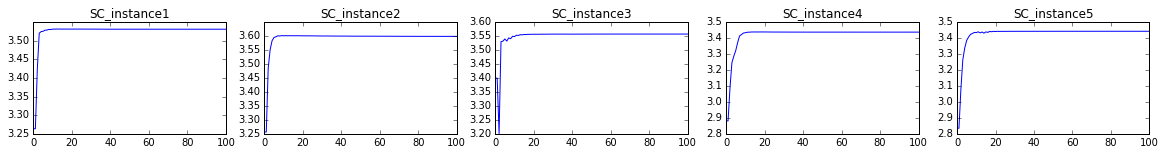

In [6]:
# for name_u in all_known_structures:
for name_u in ['SC']:
    fig, axes = plt.subplots(1, 5,squeeze=True, figsize=(20,2));
    for i in range(1, 6):
#         try:
        scores = DataManager.load_alignment_results_v3( what='scoreHistory',
      alignment_spec=dict(warp_setting=108, 
                          stack_f=dict(name='%s_instance0' % name_u, vol_type='annotationAsScore'),
                         stack_m=dict(name='%s_instance%d' % (name_u, i), vol_type='annotationAsScore')),
                 reg_root_dir=os.path.join(MESH_ROOTDIR, atlas_name, 'mean_shapes', 'instance_registration'))        
        axes[i-1].plot(scores);
        axes[i-1].set_title('%s_instance%d' % (name_u, i))
#         except:
#             pass
    plt.show();

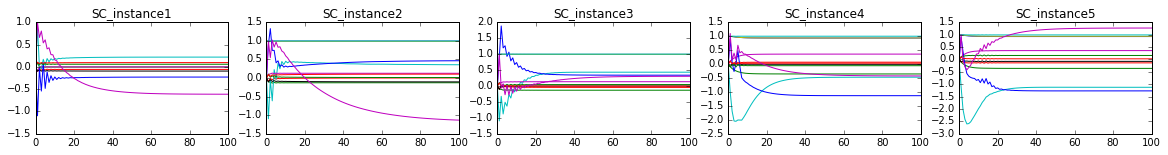

In [7]:
# for name_u in all_known_structures:
for name_u in ['SC']:
    fig, axes = plt.subplots(1, 5,squeeze=True, figsize=(20,2));
    for i in range(1, 6):
        try:
            trajectory = DataManager.load_alignment_results_v3(what='trajectory',
                              alignment_spec=dict(warp_setting=108, 
                                                  stack_f=dict(name='%s_instance0' % name_u, vol_type='annotationAsScore'),
                                                 stack_m=dict(name='%s_instance%d' % (name_u, i), vol_type='annotationAsScore')),
                                         reg_root_dir=os.path.join(MESH_ROOTDIR, atlas_name, 'mean_shapes', 'instance_registration'))        
            axes[i-1].plot(trajectory);
            axes[i-1].set_title('%s_instance%d' % (name_u, i))
        except:
            pass
    plt.show();

In [8]:
# for name_u in all_known_structures:
for name_u in ['SC']:

    # Load instance meshes.
    
    instance_meshes = []
    for i in range(6):
        m = load_data(DataManager.get_instance_mesh_filepath(atlas_name=atlas_name, structure=name_u, 
                                                         index=i, resolution='10um'))
        if m is not None:
            instance_meshes.append(m)

    launch_vtk([actor_mesh(m, wireframe=True, 
                           color=np.array(high_contrast_colors[i+1])/255., 
                           opacity=1, wireframe_linewidth=3) 
        for i, m in enumerate(instance_meshes)], 
      background_color=(1,1,1))
    
    # Load average shape.
    
    vol = load_data(DataManager.get_mean_shape_filepath(atlas_name=atlas_name, structure=name_u, what='volume', resolution='10.0um'))
    ori_wrt_meanShapeCentroid = load_data(DataManager.get_mean_shape_filepath(atlas_name=atlas_name, structure=name_u, what='origin_wrt_meanShapeCentroid', resolution='10.0um'))
    
    standard_shape_volume_actor = actor_volume(vol.astype(np.float32), 
                                               what='probability', 
                                               origin=ori_wrt_meanShapeCentroid, 
                                              c=(0,0,0))
    
    launch_vtk([standard_shape_volume_actor])

# Combine standard shapes with standard centroid locations

In [118]:
atlas_resolution = '10.0um'
atlas_resolution_um = convert_resolution_string_to_um(atlas_resolution)

In [119]:
DataManager.get_structure_mean_positions_filepath(atlas_name=atlas_name, resolution='1um')

'/home/yuncong/CSHL_meshes/atlasV7/atlasV7_1um_meanPositions.pkl'

In [31]:
nominal_centroids_wrt_canonicalAtlasSpace_um = load_data(DataManager.get_structure_mean_positions_filepath(atlas_name=atlas_name, resolution='1um'))
nominal_centroids_wrt_canonicalAtlasSpace_10um = {s: c / atlas_resolution_um for s, c in nominal_centroids_wrt_canonicalAtlasSpace_um.iteritems()}

mean_shapes_10um_wrt_stdShapeCentroid = {name_u: DataManager.load_mean_shape(atlas_name=atlas_name, structure=name_u, resolution=atlas_resolution) 
                    for name_u in all_known_structures_unsided_including_surround_200um}

In [32]:
atlas_spec = dict(name=atlas_name, vol_type='score', resolution=atlas_resolution)

In [20]:
nominal_centroids_wrt_canonicalAtlasSpace_um = load_data(DataManager.get_structure_mean_positions_filepath(atlas_name=atlas_name, resolution='1um'))
nominal_centroids_wrt_canonicalAtlasSpace_10um = {s: c / atlas_resolution_um for s, c in nominal_centroids_wrt_canonicalAtlasSpace_um.iteritems()}

mean_shapes_10um_wrt_stdShapeCentroid = {name_u: DataManager.load_mean_shape(atlas_name=atlas_name, structure=name_u, resolution=atlas_resolution) 
                    for name_u in all_known_structures_unsided_including_surround_200um}

rm -rf "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_5N_meanShape_volume.bp" && mkdir -p "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_5N_meanShape_volume.bp" "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_5N_meanShape_volume.bp"
return code: 0
rm -rf "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_5N_meanShape_origin_wrt_meanShapeCentroid.txt" && mkdir -p "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_5N_meanShape_origin_wrt_meanShapeCentroid.txt" "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_5N_meanShape_origin_wrt_meanShapeCentroid.txt"
return code: 0
rm -rf "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_6N_meanShape_volume.bp" && mkdir -p "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes"
return code: 0
aws s3 cp

return code: 0
rm -rf "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_RMC_meanShape_volume.bp" && mkdir -p "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_RMC_meanShape_volume.bp" "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_RMC_meanShape_volume.bp"
return code: 0
rm -rf "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_RMC_meanShape_origin_wrt_meanShapeCentroid.txt" && mkdir -p "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_RMC_meanShape_origin_wrt_meanShapeCentroid.txt" "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_RMC_meanShape_origin_wrt_meanShapeCentroid.txt"
return code: 0
rm -rf "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_SNC_meanShape_volume.bp" && mkdir -p "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes"
re

return code: 0
rm -rf "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_VCA_meanShape_volume.bp" && mkdir -p "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_VCA_meanShape_volume.bp" "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_VCA_meanShape_volume.bp"
return code: 0
rm -rf "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_VCA_meanShape_origin_wrt_meanShapeCentroid.txt" && mkdir -p "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_VCA_meanShape_origin_wrt_meanShapeCentroid.txt" "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_VCA_meanShape_origin_wrt_meanShapeCentroid.txt"
return code: 0
rm -rf "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_VCP_meanShape_volume.bp" && mkdir -p "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes"
re

return code: 0
rm -rf "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_7N_surround_200um_meanShape_volume.bp" && mkdir -p "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_7N_surround_200um_meanShape_volume.bp" "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_7N_surround_200um_meanShape_volume.bp"
return code: 0
rm -rf "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_7N_surround_200um_meanShape_origin_wrt_meanShapeCentroid.txt" && mkdir -p "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_7N_surround_200um_meanShape_origin_wrt_meanShapeCentroid.txt" "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_7N_surround_200um_meanShape_origin_wrt_meanShapeCentroid.txt"
return code: 0
rm -rf "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_7n_

return code: 0
rm -rf "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_SNC_surround_200um_meanShape_volume.bp" && mkdir -p "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_SNC_surround_200um_meanShape_volume.bp" "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_SNC_surround_200um_meanShape_volume.bp"
return code: 0
rm -rf "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_SNC_surround_200um_meanShape_origin_wrt_meanShapeCentroid.txt" && mkdir -p "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_SNC_surround_200um_meanShape_origin_wrt_meanShapeCentroid.txt" "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_SNC_surround_200um_meanShape_origin_wrt_meanShapeCentroid.txt"
return code: 0
rm -rf "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0

return code: 0
rm -rf "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_VCA_surround_200um_meanShape_volume.bp" && mkdir -p "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_VCA_surround_200um_meanShape_volume.bp" "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_VCA_surround_200um_meanShape_volume.bp"
return code: 0
rm -rf "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_VCA_surround_200um_meanShape_origin_wrt_meanShapeCentroid.txt" && mkdir -p "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_VCA_surround_200um_meanShape_origin_wrt_meanShapeCentroid.txt" "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0um_VCA_surround_200um_meanShape_origin_wrt_meanShapeCentroid.txt"
return code: 0
rm -rf "/home/yuncong/CSHL_meshes/atlasV7/mean_shapes/atlasV7_10.0

In [121]:
atlas_spec = dict(name=atlas_name, vol_type='score', resolution=atlas_resolution)

In [122]:
## TODO: simplify this.

# mean_shape_wrt_canonicalAtlasSpace_all_structures_10um = {}

for name_u in all_known_structures:
# for name_u in ['7N']:
      
#     mean_shape_10um, mean_shape_origin_wrt_stdShapeCentroid_10um = mean_shapes_10um_wrt_stdShapeCentroid[name_u]
#     mean_shape_surround_10um, mean_shape_surround_origin_wrt_stdShapeCentroid_10um = mean_shapes_10um_wrt_stdShapeCentroid[convert_to_surround_name(name_u, margin='200um')]
    
    if name_u in singular_structures:
                
        for name in [name_u, convert_to_surround_name(name_u, margin='200um')]:
            
            mean_shape_wrt_canonicalAtlasSpace_10um = (mean_shapes_10um_wrt_stdShapeCentroid[name][0], 
                        mean_shapes_10um_wrt_stdShapeCentroid[name][1] + nominal_centroids_wrt_canonicalAtlasSpace_10um[name_u])
            
#             mean_shape_wrt_canonicalAtlasSpace_all_structures_10um[name] = mean_shape_wrt_canonicalAtlasSpace_10um

            DataManager.save_original_volume(volume=mean_shape_wrt_canonicalAtlasSpace_10um, 
                                             stack_spec=atlas_spec, 
                                             structure=name, wrt='canonicalAtlasSpace')
        
    else:
        
        left_name = convert_to_left_name(name_u)
        left_surround_name = convert_to_surround_name(left_name, margin='200um')
        right_name = convert_to_right_name(name_u)
        right_surround_name = convert_to_surround_name(right_name, margin='200um')

        left_mean_shape_wrt_canonicalAtlasSpace_10um = mirror_volume_v2(volume=mean_shapes_10um_wrt_stdShapeCentroid[name_u],
             centroid_wrt_origin=-mean_shapes_10um_wrt_stdShapeCentroid[name_u][1],
            new_centroid=nominal_centroids_wrt_canonicalAtlasSpace_10um[left_name])

        DataManager.save_original_volume(volume=left_mean_shape_wrt_canonicalAtlasSpace_10um, 
                             stack_spec=atlas_spec, 
                             structure=left_name, wrt='canonicalAtlasSpace')

        left_mean_shape_wrt_canonicalAtlasSpace_10um = mirror_volume_v2(\
            volume=mean_shapes_10um_wrt_stdShapeCentroid[convert_to_surround_name(name_u, margin='200um')][0],
            centroid_wrt_origin=-mean_shapes_10um_wrt_stdShapeCentroid[convert_to_surround_name(name_u, margin='200um')][1],
            new_centroid=nominal_centroids_wrt_canonicalAtlasSpace_10um[left_name])        
        
        DataManager.save_original_volume(volume=left_mean_shape_wrt_canonicalAtlasSpace_10um, 
                             stack_spec=atlas_spec, 
                             structure=left_surround_name, wrt='canonicalAtlasSpace')
        
        
        right_mean_shape_wrt_canonicalAtlasSpace_10um = (mean_shapes_10um_wrt_stdShapeCentroid[name_u][0], 
        mean_shapes_10um_wrt_stdShapeCentroid[name_u][1] + nominal_centroids_wrt_canonicalAtlasSpace_10um[right_name])
        
        DataManager.save_original_volume(volume=right_mean_shape_wrt_canonicalAtlasSpace_10um, 
                                 stack_spec=atlas_spec, 
                                 structure=right_name, wrt='canonicalAtlasSpace')
            
        
        
        right_mean_shape_wrt_canonicalAtlasSpace_10um = (mean_shapes_10um_wrt_stdShapeCentroid[convert_to_surround_name(name_u, margin='200um')][0], 
        mean_shapes_10um_wrt_stdShapeCentroid[convert_to_surround_name(name_u, margin='200um')][1] + nominal_centroids_wrt_canonicalAtlasSpace_10um[right_name])
        
        DataManager.save_original_volume(volume=right_mean_shape_wrt_canonicalAtlasSpace_10um, 
                                 stack_spec=atlas_spec, 
                                 structure=right_surround_name, wrt='canonicalAtlasSpace')

aws s3 cp "/home/yuncong/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_5N_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_5N_L.bp"
return code: 0
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_5N_L_origin_wrt_canonicalAtlasSpace.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_5N_L_origin_wrt_canonicalAtlasSpace.txt"
return code: 0
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_5N_L_surround_200um.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_5N_L_surround_200um.bp"
return code: 0
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_5N_

return code: 0
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_7n_L_surround_200um_origin_wrt_canonicalAtlasSpace.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_7n_L_surround_200um_origin_wrt_canonicalAtlasSpace.txt"
return code: 0
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_7n_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_7n_R.bp"
return code: 0
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_7n_R_origin_wrt_canonicalAtlasSpace.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_7n_R_origin_wrt_canonicalAtlasSpace.txt"
return code: 0
aws s3 cp "/home/yuncong/CSHL_volumes/

return code: 0
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_LRt_R_surround_200um.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_LRt_R_surround_200um.bp"
return code: 0
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_LRt_R_surround_200um_origin_wrt_canonicalAtlasSpace.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_LRt_R_surround_200um_origin_wrt_canonicalAtlasSpace.txt"
return code: 0
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_Pn_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_Pn_L.bp"
return code: 0
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVo

return code: 0
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_RMC_L_origin_wrt_canonicalAtlasSpace.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_RMC_L_origin_wrt_canonicalAtlasSpace.txt"
return code: 0
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_RMC_L_surround_200um.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_RMC_L_surround_200um.bp"
return code: 0
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_RMC_L_surround_200um_origin_wrt_canonicalAtlasSpace.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_RMC_L_surround_200um_origin_wrt_canonicalAtlasSpace.txt"
return code: 0
aw

return code: 0
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_3N_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_3N_R.bp"
return code: 0
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_3N_R_origin_wrt_canonicalAtlasSpace.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_3N_R_origin_wrt_canonicalAtlasSpace.txt"
return code: 0
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_3N_R_surround_200um.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_3N_R_surround_200um.bp"
return code: 0
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_

return code: 0
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_Sp5O_R_surround_200um_origin_wrt_canonicalAtlasSpace.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_Sp5O_R_surround_200um_origin_wrt_canonicalAtlasSpace.txt"
return code: 0
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_Sp5C_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_Sp5C_L.bp"
return code: 0
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_Sp5C_L_origin_wrt_canonicalAtlasSpace.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_Sp5C_L_origin_wrt_canonicalAtlasSpace.txt"
return code: 0
aws s3 cp "/home/yuncong/C

return code: 0
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_VCA_L_surround_200um.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_VCA_L_surround_200um.bp"
return code: 0
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_VCA_L_surround_200um_origin_wrt_canonicalAtlasSpace.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_VCA_L_surround_200um_origin_wrt_canonicalAtlasSpace.txt"
return code: 0
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_VCA_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_VCA_R.bp"
return code: 0
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV7/atlasV7_10.0um_score

return code: 0
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_12N_origin_wrt_canonicalAtlasSpace.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_12N_origin_wrt_canonicalAtlasSpace.txt"
return code: 0
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_12N_surround_200um.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_12N_surround_200um.bp"
return code: 0
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_12N_surround_200um_origin_wrt_canonicalAtlasSpace.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_12N_surround_200um_origin_wrt_canonicalAtlasSpace.txt"
return code: 0
aws s3 cp "/ho

# Convert to vtk polydata for visualization

In [123]:
for name_s in all_known_structures_sided_including_surround_200um:
# for name_s in ['7N_L', '7N_R']:

    atlas_structure_wrt_canonicalAtlasSpace = \
    DataManager.load_original_volume_v2(stack_spec=atlas_spec, structure=name_s, bbox_wrt='canonicalAtlasSpace')

    for surface_level in np.arange(0.1, 1.1, .1):
        mean_shape_isosurface_polydata_wrt_canonicalAtlasSpace = \
        volume_to_polydata(volume=(atlas_structure_wrt_canonicalAtlasSpace[0] >= surface_level, atlas_structure_wrt_canonicalAtlasSpace[1]), 
                     num_simplify_iter=3, smooth=True, 
                     return_vertex_face_list=False)

        save_data(mean_shape_isosurface_polydata_wrt_canonicalAtlasSpace, 
                  DataManager.get_mesh_filepath_v2(atlas_spec, structure=name_s, level=surface_level))

marching cube: 0.11 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 11114: 0.12 seconds
simplify 1 @ 2224: 0.12 seconds
simplify 2 @ 446: 0.02 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_10N_L_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_10N_L_l0.1.stl"
return code: 0
marching cube: 0.12 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 9559: 0.12 seconds
simplify 1 @ 1913: 0.10 seconds
simplify 2 @ 384: 0.02 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_10N_L_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_10N_L_l0.2.stl"
return code: 0
marching cube: 0.12 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 8256: 0.09 seconds
simplify 1 @ 1652: 0.08 seconds
simplify 2 @ 332: 0.03 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV

return code: 0
marching cube: 0.11 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 11127: 0.12 seconds
simplify 1 @ 2227: 0.11 seconds
simplify 2 @ 447: 0.03 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_10N_R_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_10N_R_l0.1.stl"
return code: 0
marching cube: 0.11 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 9580: 0.10 seconds
simplify 1 @ 1917: 0.10 seconds
simplify 2 @ 385: 0.03 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_10N_R_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_10N_R_l0.2.stl"
return code: 0
marching cube: 0.11 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 8270: 0.09 seconds
simplify 1 @ 1655: 0.08 seconds
simplify 2 @ 332: 0.02 seconds
aws s3 cp "/home/yuncong/CSH

return code: 0
marching cube: 0.14 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 29988: 0.37 seconds
simplify 1 @ 5999: 0.34 seconds
simplify 2 @ 1201: 0.07 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_12N_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_12N_l0.1.stl"
return code: 0
marching cube: 0.14 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 27109: 0.33 seconds
simplify 1 @ 5423: 0.31 seconds
simplify 2 @ 1086: 0.06 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_12N_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_12N_l0.2.stl"
return code: 0
marching cube: 0.15 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 25445: 0.31 seconds
simplify 1 @ 5090: 0.28 seconds
simplify 2 @ 1019: 0.06 seconds
aws s3 cp "/home/yuncong/CSHL_m

return code: 0
marching cube: 0.03 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 8479: 0.10 seconds
simplify 1 @ 1697: 0.08 seconds
simplify 2 @ 341: 0.02 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_3N_L_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_3N_L_l0.1.stl"
return code: 0
marching cube: 0.04 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 6880: 0.09 seconds
simplify 1 @ 1377: 0.08 seconds
simplify 2 @ 277: 0.02 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_3N_L_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_3N_L_l0.2.stl"
return code: 0
marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5617: 0.07 seconds
simplify 1 @ 1125: 0.06 seconds
simplify 2 @ 226: 0.01 seconds
aws s3 cp "/home/yuncong/CSHL_mes

return code: 0
marching cube: 0.04 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 8476: 0.11 seconds
simplify 1 @ 1696: 0.09 seconds
simplify 2 @ 340: 0.02 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_3N_R_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_3N_R_l0.1.stl"
return code: 0
marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6849: 0.08 seconds
simplify 1 @ 1371: 0.07 seconds
simplify 2 @ 275: 0.02 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_3N_R_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_3N_R_l0.2.stl"
return code: 0
marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5597: 0.07 seconds
simplify 1 @ 1121: 0.05 seconds
simplify 2 @ 225: 0.01 seconds
aws s3 cp "/home/yuncong/CSHL_mes

return code: 0
marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1489: 0.02 seconds
simplify 1 @ 299: 0.01 seconds
simplify 2 @ 61: 0.00 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_4N_L_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_4N_L_l0.1.stl"
return code: 0
marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1148: 0.02 seconds
simplify 1 @ 231: 0.01 seconds
simplify 2 @ 47: 0.00 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_4N_L_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_4N_L_l0.2.stl"
return code: 0
marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 928: 0.02 seconds
simplify 1 @ 187: 0.01 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolum

simplify 1 @ 232: 0.01 seconds
simplify 2 @ 48: 0.00 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_4N_R_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_4N_R_l0.2.stl"
return code: 0
marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 920: 0.01 seconds
simplify 1 @ 185: 0.01 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_4N_R_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_4N_R_l0.3.stl"
return code: 0
marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 751: 0.01 seconds
simplify 1 @ 151: 0.01 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_4N_R_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scor

simplify 0 @ 14450: 0.18 seconds
simplify 1 @ 2891: 0.16 seconds
simplify 2 @ 579: 0.04 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_5N_L_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_5N_L_l0.3.stl"
return code: 0
marching cube: 0.08 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 13505: 0.17 seconds
simplify 1 @ 2702: 0.16 seconds
simplify 2 @ 542: 0.03 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_5N_L_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_5N_L_l0.4.stl"
return code: 0
marching cube: 0.08 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 12619: 0.18 seconds
simplify 1 @ 2525: 0.14 seconds
simplify 2 @ 506: 0.03 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_5N_L_

simplify 0 @ 14458: 0.18 seconds
simplify 1 @ 2893: 0.16 seconds
simplify 2 @ 580: 0.03 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_5N_R_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_5N_R_l0.3.stl"
return code: 0
marching cube: 0.07 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 13528: 0.16 seconds
simplify 1 @ 2707: 0.14 seconds
simplify 2 @ 543: 0.03 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_5N_R_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_5N_R_l0.4.stl"
return code: 0
marching cube: 0.07 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 12649: 0.17 seconds
simplify 1 @ 2531: 0.13 seconds
simplify 2 @ 507: 0.04 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_5N_R_

return code: 0
marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1662: 0.02 seconds
simplify 1 @ 334: 0.02 seconds
simplify 2 @ 68: 0.00 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_6N_L_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_6N_L_l0.3.stl"
return code: 0
marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1405: 0.02 seconds
simplify 1 @ 282: 0.01 seconds
simplify 2 @ 58: 0.00 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_6N_L_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_6N_L_l0.4.stl"
return code: 0
marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1230: 0.01 seconds
simplify 1 @ 247: 0.01 seconds
simplify 2 @ 51: 0.00 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/at

simplify 1 @ 334: 0.02 seconds
simplify 2 @ 68: 0.00 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_6N_R_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_6N_R_l0.3.stl"
return code: 0
marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1407: 0.02 seconds
simplify 1 @ 283: 0.01 seconds
simplify 2 @ 58: 0.00 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_6N_R_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_6N_R_l0.4.stl"
return code: 0
marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1227: 0.02 seconds
simplify 1 @ 247: 0.01 seconds
simplify 2 @ 51: 0.00 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_6N_R_l0.5.stl" "s3://mousebrainatlas-data/CSHL

return code: 0
marching cube: 0.14 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 22366: 0.29 seconds
simplify 1 @ 4474: 0.25 seconds
simplify 2 @ 896: 0.05 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_7N_L_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_7N_L_l0.4.stl"
return code: 0
marching cube: 0.13 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 21511: 0.27 seconds
simplify 1 @ 4303: 0.25 seconds
simplify 2 @ 862: 0.05 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_7N_L_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_7N_L_l0.5.stl"
return code: 0
marching cube: 0.13 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 20587: 0.26 seconds
simplify 1 @ 4119: 0.23 seconds
simplify 2 @ 825: 0.05 seconds
aws s3 cp "/home/yuncong/CSHL_

return code: 0
marching cube: 0.13 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 22319: 0.29 seconds
simplify 1 @ 4465: 0.26 seconds
simplify 2 @ 894: 0.05 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_7N_R_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_7N_R_l0.4.stl"
return code: 0
marching cube: 0.13 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 21420: 0.28 seconds
simplify 1 @ 4285: 0.24 seconds
simplify 2 @ 858: 0.05 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_7N_R_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_7N_R_l0.5.stl"
return code: 0
marching cube: 0.13 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 20552: 0.26 seconds
simplify 1 @ 4112: 0.22 seconds
simplify 2 @ 824: 0.05 seconds
aws s3 cp "/home/yuncong/CSHL_

return code: 0
marching cube: 0.28 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 18375: 0.20 seconds
simplify 1 @ 3676: 0.20 seconds
simplify 2 @ 736: 0.04 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_7n_L_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_7n_L_l0.4.stl"
return code: 0
marching cube: 0.29 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 17080: 0.21 seconds
simplify 1 @ 3417: 0.19 seconds
simplify 2 @ 685: 0.04 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_7n_L_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_7n_L_l0.5.stl"
return code: 0
marching cube: 0.30 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 15945: 0.18 seconds
simplify 1 @ 3190: 0.17 seconds
simplify 2 @ 639: 0.04 seconds
aws s3 cp "/home/yuncong/CSHL_

return code: 0
marching cube: 0.31 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 18346: 0.22 seconds
simplify 1 @ 3670: 0.22 seconds
simplify 2 @ 735: 0.05 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_7n_R_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_7n_R_l0.4.stl"
return code: 0
marching cube: 0.28 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 17050: 0.19 seconds
simplify 1 @ 3411: 0.18 seconds
simplify 2 @ 683: 0.04 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_7n_R_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_7n_R_l0.5.stl"
return code: 0
marching cube: 0.28 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 15927: 0.17 seconds
simplify 1 @ 3187: 0.16 seconds
simplify 2 @ 639: 0.03 seconds
aws s3 cp "/home/yuncong/CSHL_

return code: 0
marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5033: 0.07 seconds
simplify 1 @ 1008: 0.05 seconds
simplify 2 @ 203: 0.01 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_AP_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_AP_l0.4.stl"
return code: 0
marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4543: 0.06 seconds
simplify 1 @ 910: 0.05 seconds
simplify 2 @ 183: 0.01 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_AP_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_AP_l0.5.stl"
return code: 0
marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4102: 0.05 seconds
simplify 1 @ 822: 0.04 seconds
simplify 2 @ 166: 0.01 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV

return code: 0
marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 1617: 0.03 seconds
simplify 1 @ 325: 0.02 seconds
simplify 2 @ 66: 0.00 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Amb_L_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Amb_L_l0.4.stl"
return code: 0
marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1318: 0.02 seconds
simplify 1 @ 265: 0.01 seconds
simplify 2 @ 54: 0.00 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Amb_L_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Amb_L_l0.5.stl"
return code: 0
marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1164: 0.02 seconds
simplify 1 @ 234: 0.01 seconds
simplify 2 @ 48: 0.00 seconds
aws s3 cp "/home/yuncong/CSHL_meshe

simplify 1 @ 325: 0.02 seconds
simplify 2 @ 66: 0.00 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Amb_R_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Amb_R_l0.4.stl"
return code: 0
marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 1318: 0.02 seconds
simplify 1 @ 265: 0.01 seconds
simplify 2 @ 54: 0.00 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Amb_R_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Amb_R_l0.5.stl"
return code: 0
marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1166: 0.02 seconds
simplify 1 @ 234: 0.01 seconds
simplify 2 @ 48: 0.00 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Amb_R_l0.6.stl" "s3://mousebrainatlas-data

simplify 0 @ 24255: 0.28 seconds
simplify 1 @ 4852: 0.29 seconds
simplify 2 @ 972: 0.06 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_DC_L_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_DC_L_l0.4.stl"
return code: 0
marching cube: 0.30 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 22837: 0.25 seconds
simplify 1 @ 4569: 0.26 seconds
simplify 2 @ 915: 0.05 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_DC_L_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_DC_L_l0.5.stl"
return code: 0
marching cube: 0.29 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 21432: 0.25 seconds
simplify 1 @ 4288: 0.24 seconds
simplify 2 @ 859: 0.05 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_DC_L_

marching cube: 0.32 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 24245: 0.30 seconds
simplify 1 @ 4850: 0.29 seconds
simplify 2 @ 971: 0.06 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_DC_R_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_DC_R_l0.4.stl"
return code: 0
marching cube: 0.32 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 22807: 0.28 seconds
simplify 1 @ 4563: 0.27 seconds
simplify 2 @ 914: 0.06 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_DC_R_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_DC_R_l0.5.stl"
return code: 0
marching cube: 0.32 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 21408: 0.26 seconds
simplify 1 @ 4283: 0.25 seconds
simplify 2 @ 858: 0.06 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/

marching cube: 2.30 seconds
mesh_to_polydata: 0.37 seconds
simplify 0 @ 179226: 2.41 seconds
simplify 1 @ 35846: 2.58 seconds
simplify 2 @ 7170: 0.52 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_IC_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_IC_l0.4.stl"
return code: 0
marching cube: 2.32 seconds
mesh_to_polydata: 0.34 seconds
simplify 0 @ 168596: 2.27 seconds
simplify 1 @ 33720: 2.43 seconds
simplify 2 @ 6745: 0.48 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_IC_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_IC_l0.5.stl"
return code: 0
marching cube: 2.32 seconds
mesh_to_polydata: 0.33 seconds
simplify 0 @ 158559: 2.16 seconds
simplify 1 @ 31713: 2.19 seconds
simplify 2 @ 6344: 0.44 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7

simplify 0 @ 7579: 0.09 seconds
simplify 1 @ 1517: 0.08 seconds
simplify 2 @ 305: 0.02 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_LC_L_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_LC_L_l0.4.stl"
return code: 0
marching cube: 0.05 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 6961: 0.08 seconds
simplify 1 @ 1393: 0.07 seconds
simplify 2 @ 280: 0.02 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_LC_L_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_LC_L_l0.5.stl"
return code: 0
marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6226: 0.07 seconds
simplify 1 @ 1246: 0.06 seconds
simplify 2 @ 250: 0.01 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_LC_L_l0.

return code: 0
marching cube: 0.04 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 7538: 0.13 seconds
simplify 1 @ 1509: 0.08 seconds
simplify 2 @ 303: 0.02 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_LC_R_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_LC_R_l0.4.stl"
return code: 0
marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6928: 0.09 seconds
simplify 1 @ 1387: 0.07 seconds
simplify 2 @ 279: 0.02 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_LC_R_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_LC_R_l0.5.stl"
return code: 0
marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6197: 0.08 seconds
simplify 1 @ 1241: 0.06 seconds
simplify 2 @ 249: 0.02 seconds
aws s3 cp "/home/yuncong/CSHL_mes

return code: 0
marching cube: 0.19 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 22632: 0.27 seconds
simplify 1 @ 4528: 0.26 seconds
simplify 2 @ 907: 0.05 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_LRt_L_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_LRt_L_l0.4.stl"
return code: 0
marching cube: 0.19 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 20655: 0.27 seconds
simplify 1 @ 4132: 0.24 seconds
simplify 2 @ 828: 0.05 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_LRt_L_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_LRt_L_l0.5.stl"
return code: 0
marching cube: 0.20 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 18869: 0.23 seconds
simplify 1 @ 3775: 0.21 seconds
simplify 2 @ 756: 0.04 seconds
aws s3 cp "/home/yuncong/C

return code: 0
marching cube: 0.20 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 22681: 0.27 seconds
simplify 1 @ 4537: 0.27 seconds
simplify 2 @ 909: 0.05 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_LRt_R_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_LRt_R_l0.4.stl"
return code: 0
marching cube: 0.20 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 20671: 0.25 seconds
simplify 1 @ 4135: 0.24 seconds
simplify 2 @ 828: 0.05 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_LRt_R_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_LRt_R_l0.5.stl"
return code: 0
marching cube: 0.20 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 18900: 0.22 seconds
simplify 1 @ 3781: 0.23 seconds
simplify 2 @ 757: 0.04 seconds
aws s3 cp "/home/yuncong/C

aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_PBG_L_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_PBG_L_l0.4.stl"
return code: 0
marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3061: 0.04 seconds
simplify 1 @ 613: 0.04 seconds
simplify 2 @ 124: 0.01 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_PBG_L_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_PBG_L_l0.5.stl"
return code: 0
marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 2482: 0.03 seconds
simplify 1 @ 498: 0.02 seconds
simplify 2 @ 101: 0.01 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_PBG_L_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.

simplify 2 @ 150: 0.01 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_PBG_R_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_PBG_R_l0.4.stl"
return code: 0
marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3061: 0.03 seconds
simplify 1 @ 613: 0.03 seconds
simplify 2 @ 124: 0.01 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_PBG_R_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_PBG_R_l0.5.stl"
return code: 0
marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 2463: 0.03 seconds
simplify 1 @ 494: 0.02 seconds
simplify 2 @ 100: 0.01 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_PBG_R_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7

simplify 0 @ 34246: 0.49 seconds
simplify 1 @ 6850: 0.44 seconds
simplify 2 @ 1371: 0.09 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Pn_L_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Pn_L_l0.4.stl"
return code: 0
marching cube: 0.22 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 32179: 0.43 seconds
simplify 1 @ 6437: 0.39 seconds
simplify 2 @ 1289: 0.07 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Pn_L_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Pn_L_l0.5.stl"
return code: 0
marching cube: 0.22 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 30267: 0.40 seconds
simplify 1 @ 6055: 0.36 seconds
simplify 2 @ 1212: 0.07 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Pn

return code: 0
marching cube: 0.23 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 34392: 0.48 seconds
simplify 1 @ 6880: 0.46 seconds
simplify 2 @ 1377: 0.09 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Pn_R_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Pn_R_l0.4.stl"
return code: 0
marching cube: 0.24 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 32284: 0.43 seconds
simplify 1 @ 6458: 0.37 seconds
simplify 2 @ 1293: 0.08 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Pn_R_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Pn_R_l0.5.stl"
return code: 0
marching cube: 0.23 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 30335: 0.44 seconds
simplify 1 @ 6068: 0.38 seconds
simplify 2 @ 1215: 0.08 seconds
aws s3 cp "/home/yuncong/CS

return code: 0
marching cube: 0.09 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 11606: 0.14 seconds
simplify 1 @ 2322: 0.11 seconds
simplify 2 @ 466: 0.03 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_RMC_L_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_RMC_L_l0.4.stl"
return code: 0
marching cube: 0.09 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 10537: 0.12 seconds
simplify 1 @ 2109: 0.10 seconds
simplify 2 @ 423: 0.02 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_RMC_L_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_RMC_L_l0.5.stl"
return code: 0
marching cube: 0.09 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 9535: 0.11 seconds
simplify 1 @ 1908: 0.10 seconds
simplify 2 @ 383: 0.02 seconds
aws s3 cp "/home/yuncong/CS

return code: 0
marching cube: 0.09 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 11594: 0.14 seconds
simplify 1 @ 2320: 0.13 seconds
simplify 2 @ 465: 0.03 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_RMC_R_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_RMC_R_l0.4.stl"
return code: 0
marching cube: 0.09 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 10546: 0.13 seconds
simplify 1 @ 2110: 0.12 seconds
simplify 2 @ 423: 0.04 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_RMC_R_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_RMC_R_l0.5.stl"
return code: 0
marching cube: 0.09 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 9549: 0.11 seconds
simplify 1 @ 1911: 0.11 seconds
simplify 2 @ 383: 0.02 seconds
aws s3 cp "/home/yuncong/CS

marching cube: 0.51 seconds
mesh_to_polydata: 0.10 seconds
simplify 0 @ 46030: 0.68 seconds
simplify 1 @ 9207: 0.62 seconds
simplify 2 @ 1843: 0.13 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_RtTg_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_RtTg_l0.4.stl"
return code: 0
marching cube: 0.49 seconds
mesh_to_polydata: 0.09 seconds
simplify 0 @ 42359: 0.58 seconds
simplify 1 @ 8473: 0.53 seconds
simplify 2 @ 1696: 0.10 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_RtTg_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_RtTg_l0.5.stl"
return code: 0
marching cube: 0.48 seconds
mesh_to_polydata: 0.08 seconds
simplify 0 @ 39174: 0.52 seconds
simplify 1 @ 7836: 0.48 seconds
simplify 2 @ 1568: 0.10 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlas

return code: 0
marching cube: 2.32 seconds
mesh_to_polydata: 0.43 seconds
simplify 0 @ 208543: 2.68 seconds
simplify 1 @ 41710: 2.88 seconds
simplify 2 @ 8343: 0.65 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_SC_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_SC_l0.4.stl"
return code: 0
marching cube: 2.28 seconds
mesh_to_polydata: 0.40 seconds
simplify 0 @ 198710: 2.59 seconds
simplify 1 @ 39743: 2.79 seconds
simplify 2 @ 7950: 0.59 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_SC_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_SC_l0.5.stl"
return code: 0
marching cube: 2.36 seconds
mesh_to_polydata: 0.41 seconds
simplify 0 @ 189492: 2.46 seconds
simplify 1 @ 37900: 2.59 seconds
simplify 2 @ 7581: 0.54 seconds
aws s3 cp "/home/yuncong/CSHL

return code: 0
marching cube: 0.18 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 14442: 0.14 seconds
simplify 1 @ 2890: 0.17 seconds
simplify 2 @ 579: 0.03 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_SNC_L_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_SNC_L_l0.4.stl"
return code: 0
marching cube: 0.18 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 12880: 0.13 seconds
simplify 1 @ 2577: 0.14 seconds
simplify 2 @ 517: 0.03 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_SNC_L_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_SNC_L_l0.5.stl"
return code: 0
marching cube: 0.17 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 11426: 0.11 seconds
simplify 1 @ 2286: 0.12 seconds
simplify 2 @ 458: 0.03 seconds
aws s3 cp "/home/yuncong/C

return code: 0
marching cube: 0.16 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 14449: 0.14 seconds
simplify 1 @ 2891: 0.17 seconds
simplify 2 @ 579: 0.03 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_SNC_R_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_SNC_R_l0.4.stl"
return code: 0
marching cube: 0.17 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12885: 0.12 seconds
simplify 1 @ 2578: 0.14 seconds
simplify 2 @ 517: 0.03 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_SNC_R_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_SNC_R_l0.5.stl"
return code: 0
marching cube: 0.16 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 11420: 0.11 seconds
simplify 1 @ 2285: 0.12 seconds
simplify 2 @ 458: 0.03 seconds
aws s3 cp "/home/yuncong/C

return code: 0
marching cube: 0.48 seconds
mesh_to_polydata: 0.11 seconds
simplify 0 @ 55668: 0.63 seconds
simplify 1 @ 11135: 0.72 seconds
simplify 2 @ 2228: 0.14 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_SNR_L_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_SNR_L_l0.4.stl"
return code: 0
marching cube: 0.47 seconds
mesh_to_polydata: 0.10 seconds
simplify 0 @ 53212: 0.59 seconds
simplify 1 @ 10644: 0.66 seconds
simplify 2 @ 2130: 0.13 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_SNR_L_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_SNR_L_l0.5.stl"
return code: 0
marching cube: 0.49 seconds
mesh_to_polydata: 0.11 seconds
simplify 0 @ 50989: 0.61 seconds
simplify 1 @ 10199: 0.67 seconds
simplify 2 @ 2041: 0.13 seconds
aws s3 cp "/home/yun

return code: 0
marching cube: 0.46 seconds
mesh_to_polydata: 0.11 seconds
simplify 0 @ 55681: 0.65 seconds
simplify 1 @ 11137: 0.75 seconds
simplify 2 @ 2229: 0.15 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_SNR_R_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_SNR_R_l0.4.stl"
return code: 0
marching cube: 0.48 seconds
mesh_to_polydata: 0.10 seconds
simplify 0 @ 53299: 0.62 seconds
simplify 1 @ 10661: 0.70 seconds
simplify 2 @ 2133: 0.14 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_SNR_R_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_SNR_R_l0.5.stl"
return code: 0
marching cube: 0.50 seconds
mesh_to_polydata: 0.10 seconds
simplify 0 @ 51038: 0.59 seconds
simplify 1 @ 10209: 0.68 seconds
simplify 2 @ 2043: 0.13 seconds
aws s3 cp "/home/yun

marching cube: 0.79 seconds
mesh_to_polydata: 0.12 seconds
simplify 0 @ 64223: 0.76 seconds
simplify 1 @ 12846: 0.99 seconds
simplify 2 @ 2570: 0.16 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Sp5C_L_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Sp5C_L_l0.4.stl"
return code: 0
marching cube: 0.80 seconds
mesh_to_polydata: 0.12 seconds
simplify 0 @ 60102: 0.69 seconds
simplify 1 @ 12022: 0.78 seconds
simplify 2 @ 2406: 0.16 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Sp5C_L_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Sp5C_L_l0.5.stl"
return code: 0
marching cube: 0.81 seconds
mesh_to_polydata: 0.12 seconds
simplify 0 @ 55850: 0.65 seconds
simplify 1 @ 11171: 0.73 seconds
simplify 2 @ 2235: 0.14 seconds
aws s3 cp "/home/yuncong/CSHL_m

return code: 0
marching cube: 0.78 seconds
mesh_to_polydata: 0.12 seconds
simplify 0 @ 64297: 0.72 seconds
simplify 1 @ 12861: 0.80 seconds
simplify 2 @ 2573: 0.16 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Sp5C_R_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Sp5C_R_l0.4.stl"
return code: 0
marching cube: 0.76 seconds
mesh_to_polydata: 0.11 seconds
simplify 0 @ 60128: 0.65 seconds
simplify 1 @ 12027: 0.74 seconds
simplify 2 @ 2407: 0.15 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Sp5C_R_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Sp5C_R_l0.5.stl"
return code: 0
marching cube: 0.75 seconds
mesh_to_polydata: 0.11 seconds
simplify 0 @ 55794: 0.61 seconds
simplify 1 @ 11160: 0.70 seconds
simplify 2 @ 2233: 0.14 seconds
aws s3 cp "/home

return code: 0
marching cube: 0.25 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 30596: 0.45 seconds
simplify 1 @ 6120: 0.37 seconds
simplify 2 @ 1225: 0.07 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Sp5I_L_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Sp5I_L_l0.4.stl"
return code: 0
marching cube: 0.25 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 28366: 0.41 seconds
simplify 1 @ 5674: 0.34 seconds
simplify 2 @ 1136: 0.07 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Sp5I_L_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Sp5I_L_l0.5.stl"
return code: 0
marching cube: 0.24 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 26449: 0.39 seconds
simplify 1 @ 5291: 0.30 seconds
simplify 2 @ 1059: 0.06 seconds
aws s3 cp "/home/yu

return code: 0
marching cube: 0.26 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 30462: 0.45 seconds
simplify 1 @ 6094: 0.36 seconds
simplify 2 @ 1220: 0.07 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Sp5I_R_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Sp5I_R_l0.4.stl"
return code: 0
marching cube: 0.25 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 28257: 0.40 seconds
simplify 1 @ 5653: 0.32 seconds
simplify 2 @ 1132: 0.06 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Sp5I_R_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Sp5I_R_l0.5.stl"
return code: 0
marching cube: 0.24 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 26348: 0.38 seconds
simplify 1 @ 5271: 0.30 seconds
simplify 2 @ 1055: 0.06 seconds
aws s3 cp "/home/yu

return code: 0
marching cube: 0.42 seconds
mesh_to_polydata: 0.10 seconds
simplify 0 @ 38501: 0.72 seconds
simplify 1 @ 7701: 0.52 seconds
simplify 2 @ 1541: 0.10 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Sp5O_L_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Sp5O_L_l0.4.stl"
return code: 0
marching cube: 0.43 seconds
mesh_to_polydata: 0.10 seconds
simplify 0 @ 36045: 0.68 seconds
simplify 1 @ 7210: 0.49 seconds
simplify 2 @ 1443: 0.09 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Sp5O_L_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Sp5O_L_l0.5.stl"
return code: 0
marching cube: 0.43 seconds
mesh_to_polydata: 0.09 seconds
simplify 0 @ 33965: 0.63 seconds
simplify 1 @ 6794: 0.44 seconds
simplify 2 @ 1360: 0.09 seconds
aws s3 cp "/home/yu

return code: 0
marching cube: 0.42 seconds
mesh_to_polydata: 0.10 seconds
simplify 0 @ 38472: 0.72 seconds
simplify 1 @ 7696: 0.52 seconds
simplify 2 @ 1540: 0.10 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Sp5O_R_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Sp5O_R_l0.4.stl"
return code: 0
marching cube: 0.40 seconds
mesh_to_polydata: 0.09 seconds
simplify 0 @ 36059: 0.65 seconds
simplify 1 @ 7213: 0.43 seconds
simplify 2 @ 1444: 0.09 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Sp5O_R_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Sp5O_R_l0.5.stl"
return code: 0
marching cube: 0.40 seconds
mesh_to_polydata: 0.08 seconds
simplify 0 @ 33950: 0.59 seconds
simplify 1 @ 6791: 0.41 seconds
simplify 2 @ 1359: 0.08 seconds
aws s3 cp "/home/yu

return code: 0
marching cube: 0.06 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 9047: 0.12 seconds
simplify 1 @ 1811: 0.09 seconds
simplify 2 @ 363: 0.02 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Tz_L_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Tz_L_l0.4.stl"
return code: 0
marching cube: 0.07 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 8336: 0.12 seconds
simplify 1 @ 1668: 0.08 seconds
simplify 2 @ 335: 0.02 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Tz_L_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Tz_L_l0.5.stl"
return code: 0
marching cube: 0.06 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 7824: 0.10 seconds
simplify 1 @ 1566: 0.07 seconds
simplify 2 @ 314: 0.02 seconds
aws s3 cp "/home/yuncong/CSHL_mes

return code: 0
marching cube: 0.07 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 9048: 0.13 seconds
simplify 1 @ 1811: 0.09 seconds
simplify 2 @ 363: 0.02 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Tz_R_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Tz_R_l0.4.stl"
return code: 0
marching cube: 0.06 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 8316: 0.12 seconds
simplify 1 @ 1664: 0.10 seconds
simplify 2 @ 334: 0.02 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Tz_R_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_Tz_R_l0.5.stl"
return code: 0
marching cube: 0.07 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 7799: 0.12 seconds
simplify 1 @ 1561: 0.08 seconds
simplify 2 @ 313: 0.02 seconds
aws s3 cp "/home/yuncong/CSHL_mes

return code: 0
marching cube: 0.20 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 27240: 0.30 seconds
simplify 1 @ 5449: 0.31 seconds
simplify 2 @ 1091: 0.06 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_VCA_L_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_VCA_L_l0.4.stl"
return code: 0
marching cube: 0.19 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 25586: 0.28 seconds
simplify 1 @ 5118: 0.29 seconds
simplify 2 @ 1025: 0.06 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_VCA_L_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_VCA_L_l0.5.stl"
return code: 0
marching cube: 0.21 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 24028: 0.29 seconds
simplify 1 @ 4807: 0.30 seconds
simplify 2 @ 963: 0.06 seconds
aws s3 cp "/home/yuncong

marching cube: 0.21 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 27164: 0.32 seconds
simplify 1 @ 5434: 0.33 seconds
simplify 2 @ 1088: 0.07 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_VCA_R_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_VCA_R_l0.4.stl"
return code: 0
marching cube: 0.21 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 25462: 0.30 seconds
simplify 1 @ 5094: 0.32 seconds
simplify 2 @ 1020: 0.06 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_VCA_R_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_VCA_R_l0.5.stl"
return code: 0
marching cube: 0.20 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 23906: 0.28 seconds
simplify 1 @ 4782: 0.28 seconds
simplify 2 @ 958: 0.07 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/at

simplify 0 @ 14455: 0.16 seconds
simplify 1 @ 2892: 0.15 seconds
simplify 2 @ 580: 0.03 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_VCP_L_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_VCP_L_l0.4.stl"
return code: 0
marching cube: 0.14 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 13278: 0.15 seconds
simplify 1 @ 2657: 0.13 seconds
simplify 2 @ 533: 0.03 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_VCP_L_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_VCP_L_l0.5.stl"
return code: 0
marching cube: 0.14 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12167: 0.14 seconds
simplify 1 @ 2435: 0.12 seconds
simplify 2 @ 488: 0.03 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_V

return code: 0
marching cube: 0.15 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 14498: 0.17 seconds
simplify 1 @ 2901: 0.16 seconds
simplify 2 @ 581: 0.03 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_VCP_R_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_VCP_R_l0.4.stl"
return code: 0
marching cube: 0.15 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 13349: 0.16 seconds
simplify 1 @ 2671: 0.16 seconds
simplify 2 @ 535: 0.03 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_VCP_R_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_VCP_R_l0.5.stl"
return code: 0
marching cube: 0.15 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 12216: 0.15 seconds
simplify 1 @ 2444: 0.13 seconds
simplify 2 @ 490: 0.03 seconds
aws s3 cp "/home/yuncong/C

marching cube: 0.42 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 21430: 0.31 seconds
simplify 1 @ 4287: 0.26 seconds
simplify 2 @ 859: 0.05 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_VLL_L_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_VLL_L_l0.4.stl"
return code: 0
marching cube: 0.41 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 19694: 0.28 seconds
simplify 1 @ 3940: 0.23 seconds
simplify 2 @ 789: 0.05 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_VLL_L_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_VLL_L_l0.5.stl"
return code: 0
marching cube: 0.39 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 17989: 0.25 seconds
simplify 1 @ 3599: 0.19 seconds
simplify 2 @ 721: 0.04 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atla

marching cube: 0.39 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 21444: 0.29 seconds
simplify 1 @ 4290: 0.24 seconds
simplify 2 @ 859: 0.05 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_VLL_R_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_VLL_R_l0.4.stl"
return code: 0
marching cube: 0.39 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 19672: 0.27 seconds
simplify 1 @ 3936: 0.21 seconds
simplify 2 @ 788: 0.04 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_VLL_R_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_VLL_R_l0.5.stl"
return code: 0
marching cube: 0.39 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 17977: 0.24 seconds
simplify 1 @ 3597: 0.19 seconds
simplify 2 @ 721: 0.04 seconds
aws s3 cp "/home/yuncong/CSHL_meshes/atla

In [24]:
mean_shape_level05isosurface_polydata_wrt_canonicalAtlasSpace_all_structures = \
{name_s: load_data(DataManager.get_mesh_filepath_v2(atlas_spec, structure=name_s, level=0.5))
for name_s in all_known_structures_sided}

In [25]:
launch_vtk([actor_mesh(v, wireframe=False, opacity=.5, color=name_unsided_to_color_float[convert_to_original_name(s)]) 
            for s, v in mean_shape_level05isosurface_polydata_wrt_canonicalAtlasSpace_all_structures.iteritems()] \
          + [actor_sphere([0,0,0])])

# Shell

Just use MD589's shell, until we find a way to average the outlines.

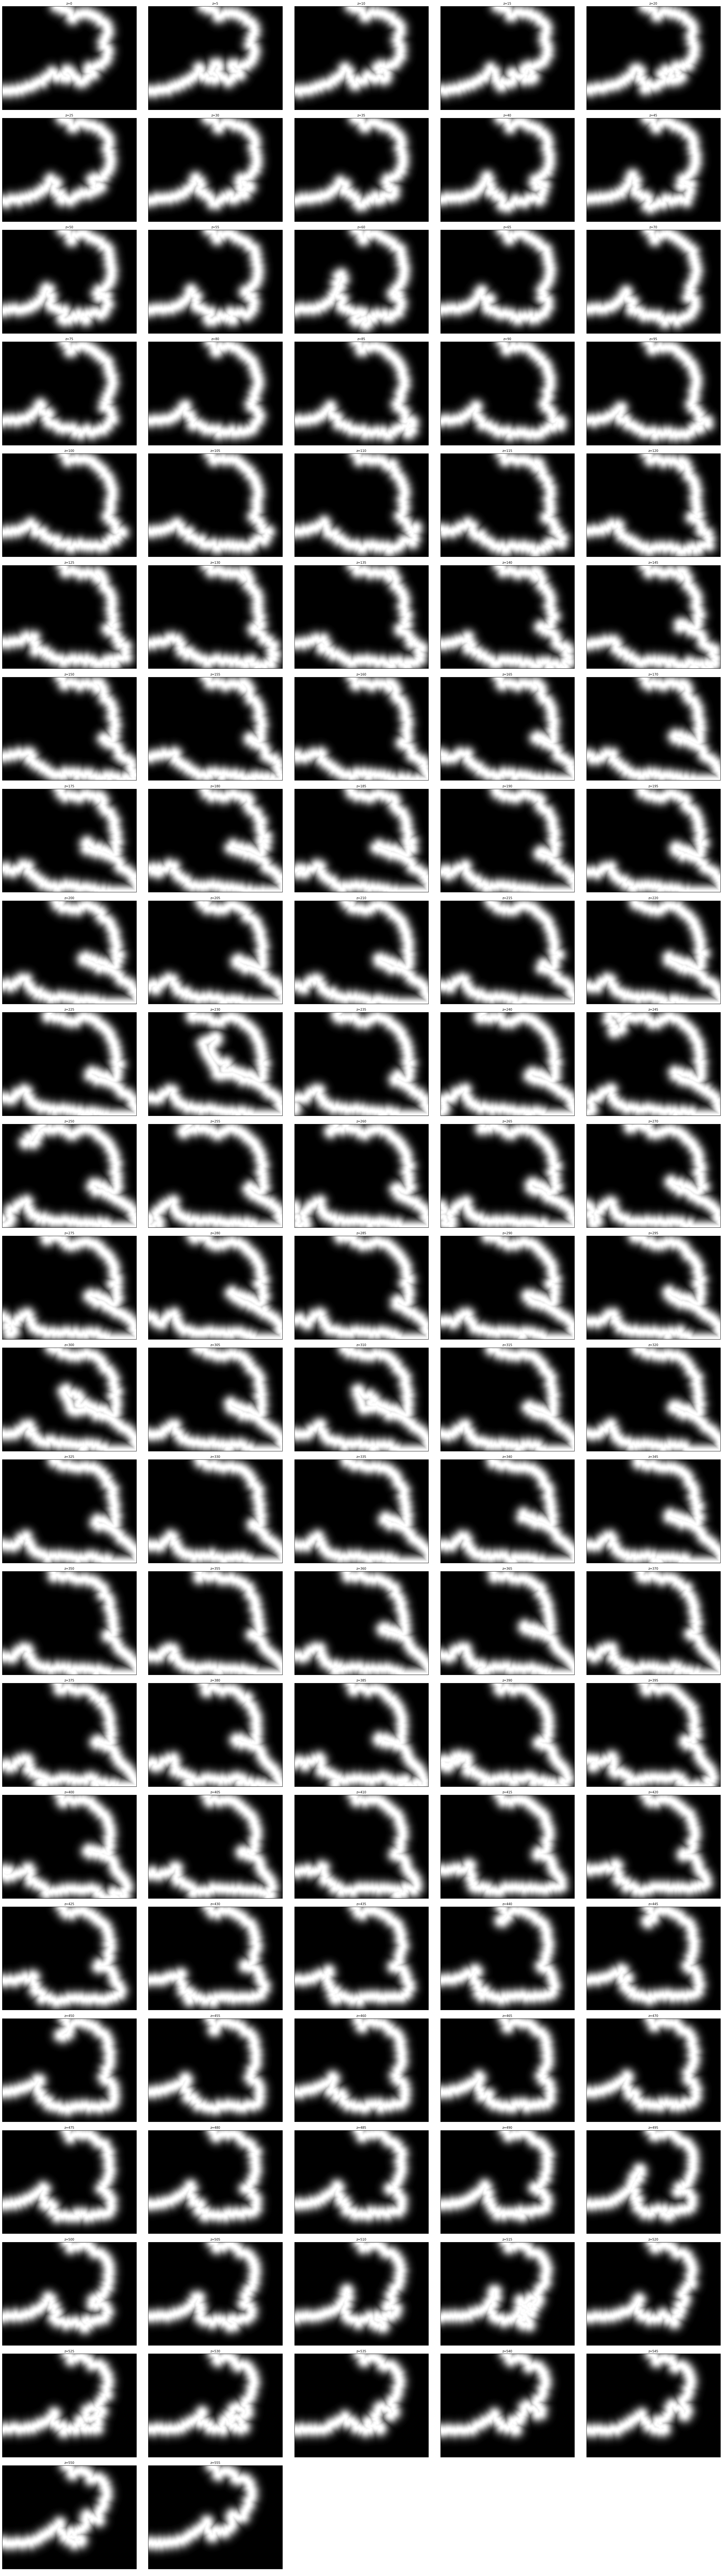

In [84]:
# from conversion import *

# margin_um = 200
# margin_tb = margin_um / XY_PIXEL_DISTANCE_TB

# from scipy.ndimage.morphology import distance_transform_edt

# # for stack in ['MD594', 'MD585', 'MD593', 'MD592', 'MD590', 'MD591', 'MD595', 'MD598', 'MD602']:
# for stack in ['MD589']:
    
# #     contours_valid_by_z = {}
#     contour_prob_maps_by_sec = {}
    
#     for sec in metadata_cache['valid_sections'][stack]:
                
#         m = DataManager.load_thumbnail_mask_v3(stack, prep_id=2, section=sec)
#         contours = find_contour_points(m, sample_every=1)[1]
#         contours_valid = [cnt[(cnt[:,0] >= 1) & (cnt[:,1] >= 1)] for cnt in contours]
        
# #         z = np.mean(DataManager.convert_section_to_z(stack, sec, downsample=32, z_begin=0))
# #         contours_valid_by_z[z] = contours_valid[0]
        
#         m2 = np.zeros_like(m, np.bool)
#         for cnt in contours_valid:
#             m2[cnt[:,1], cnt[:,0]] = 1
#         distance_to_contour = distance_transform_edt(~m2)
#         contour_prob_map = np.exp(-distance_to_contour**2/(2*margin_tb)**2)
#         contour_prob_map[contour_prob_map < 1e-2] = 0
#         contour_prob_maps_by_sec[sec] = contour_prob_map
        
# outline_prob_volume_atlasResol, outline_prob_volume_origin_wrt_wholebrainXYcropped_atlasResol = \
# images_to_volume_v2(images=contour_prob_maps_by_sec, spacing_um=20, 
#                     in_resol_um=convert_resolution_string_to_um(resolution='down32', stack=stack_fixed),
#                     out_resol_um = atlas_resolution_um)
                                                                    
# # outline_prob_volume_bbox (xm,xm,ym,ym) relative to cropped, (zm,zm) relative to uncropped.

# # crop_box = metadata_cache['cropbox']['MD589']
# alignedBrainstemCrop_cropbox_down32 = DataManager.load_cropbox_v2(stack=stack_fixed, prep_id='alignedBrainstemCrop')
# alignedBrainstemCrop_cropbox_atlasResol = alignedBrainstemCrop_cropbox_down32 * convert_resolution_string_to_um('down32', stack=stack_fixed) / atlas_resolution_um

# outline_prob_volume_origin_rel2fixedwholebrain_atlasResol = outline_prob_volume_origin_wrt_wholebrainXYcropped_atlasResol + (alignedBrainstemCrop_cropbox_atlasResol[0], alignedBrainstemCrop_cropbox_atlasResol[2], 0)

# display_volume_sections(outline_prob_volume, direction='z', ncols=5, cmap=plt.cm.gray, start_level=0)

In [85]:
# outline_prob_volume_origin_rel2canon_atlasResol = outline_prob_volume_origin_rel2fixedwholebrain_atlasResol - \
# canonical_center_wrt_fixed_um/convert_resolution_string_to_um(resolution='10.0um')

In [87]:
# shell_vol_origin_dict_rel2canon = {'shell': (outline_prob_volume_atlasResol, outline_prob_volume_origin_rel2canon_atlasResol)}

# Side task: compute the volumes of structures

In [26]:
volumes = \
DataManager.load_original_volume_all_known_structures_v3(atlas_spec, 
                                                         in_bbox_wrt='canonicalAtlasSpace',
                                                         include_surround=True, 
                           structures=all_known_structures_sided)

volumes_mm3 = defaultdict(dict)
for name_u in all_known_structures:
    for level in np.arange(0, 1.1, .1):
        volumes_mm3[name_u][level] = np.count_nonzero(volumes[convert_to_left_name(name_u)][0] > level) * 10.**3 / 1e9

Prior structure/index map not found. Generating a new one.


In [28]:
DataFrame(volumes_mm3).to_csv('/home/yuncong/Dropbox/BrainProjectFiguresByTopic/BuildingAtlas/measurements/structure_volumes_mm3.csv')

# Load

In [48]:
standard_shape_level05surface_polydata_wrt_canonicalAtlasSpace_all_structures = \
DataManager.load_meshes_v2(atlas_spec, levels=.5, include_surround=True, 
                           structures=all_known_structures_sided)
#                            structures=all_known_structures_sided + all_known_structures_sided_with_surround_200um)

In [49]:
launch_vtk([actor_mesh(p, wireframe=False, opacity=0.5) 
           for s, p in standard_shape_level05surface_polydata_wrt_canonicalAtlasSpace_all_structures.iteritems()] \
            + [actor_sphere((0,0,0), radius=1)])

In [52]:
# Show multiple iso-surfaces

standard_shape_level010surface_polydata_wrt_canonicalAtlasSpace_all_structures = \
DataManager.load_meshes_v2(atlas_spec, levels=.1, include_surround=True, 
                           structures=all_known_structures_sided)
#                            structures=all_known_structures_sided + all_known_structures_sided_with_surround_200um)

standard_shape_level090surface_polydata_wrt_canonicalAtlasSpace_all_structures = \
DataManager.load_meshes_v2(atlas_spec, levels=.9, include_surround=True, 
                           structures=all_known_structures_sided)
#                            structures=all_known_structures_sided + all_known_structures_sided_with_surround_200um)

In [48]:
launch_vtk([actor_mesh(p, wireframe=False, color=name_unsided_to_color_float[convert_to_unsided_label(s)], opacity=.2) 
           for s, p in standard_shape_level010surface_polydata_wrt_canonicalAtlasSpace_all_structures.iteritems()] \
           + [actor_mesh(p, wireframe=False, color=name_unsided_to_color_float[convert_to_unsided_label(s)], opacity=.1) 
           for s, p in standard_shape_level090surface_polydata_wrt_canonicalAtlasSpace_all_structures.iteritems()] \
            + [actor_sphere((0,0,0), radius=1)])

In [2]:
# Load shell
# Shell mesh for a particular brain is produced by `render_shell_from_tissue_masks.ipynb`

# Symmetricalize shell

In [45]:
brain_spec = dict(name='MD589', 
                  resolution='10.0um', 
                  vol_type='annotationAsScore')
stack = brain_spec['name']

In [46]:
output_resolution = '10.0um'
output_resolution_um = 10.

In [47]:
download_from_s3(DataManager.get_image_dir_v2(stack=stack, prep_id='alignedPadded', 
                                              resol='thumbnail', version='mask'), 
                 is_dir=True, local_root=DATA_ROOTDIR, redownload=True)

rm -rf "/data/CSHL_data_processed/MD589/MD589_prep1_thumbnail_mask" && mkdir -p "/data/CSHL_data_processed/MD589"
return code: 0
aws s3 cp --recursive "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep1_thumbnail_mask" "/data/CSHL_data_processed/MD589/MD589_prep1_thumbnail_mask"
return code: 0


In [48]:
from skimage.morphology import binary_closing, disk, remove_small_holes
fatten_masks = True

masks_tbResol = {}

for sec in metadata_cache['valid_sections_all'][stack]:
    
    mask_tbResol = DataManager.load_thumbnail_mask_v3(stack, prep_id='alignedPadded', section=sec)
    
    if fatten_masks:
        mask_tbResol = binary_closing(mask_tbResol, selem=disk(10))
        mask_tbResol = remove_small_holes(mask_tbResol, min_size=10000)
    
    masks_tbResol[sec] = mask_tbResol

In [49]:
tb_resol = 'thumbnail'

In [50]:
# Specify isotropic resolution of the output volume.
voxel_size_um = convert_resolution_string_to_um(resolution=output_resolution, stack=stack)

input_image_resolution_um = convert_resolution_string_to_um(resolution=tb_resol, stack=stack)

volume_outVolResol, volume_origin_wrt_wholebrain_outVolResol = images_to_volume_v2(images=masks_tbResol, 
                                            spacing_um=20.,
                                            in_resol_um=input_image_resolution_um,
                                            out_resol_um=voxel_size_um)
print volume_outVolResol.shape

(901, 1628, 895)


In [51]:
symmetrical_mask_outVolResol = symmetricalize_volume(volume_outVolResol)

In [90]:
# symmetrical_mask3d_outputResol_polydata = \
symmetrical_mask3d_outputResol_vertices, symmetrical_mask3d_outputResol_faces = \
volume_to_polydata(symmetrical_mask_outVolResol.astype(np.float), num_simplify_iter=5, smooth=True, 
                   level=0.5, min_vertices=200, return_vertex_face_list=True)

marching cube: 177.10 seconds
mesh_to_polydata: 10.59 seconds
simplify 0 @ 3470391: 110.36 seconds
simplify 1 @ 694132: 58.87 seconds
simplify 2 @ 138838: 12.94 seconds
simplify 3 @ 27776: 2.49 seconds
simplify 4 @ 5561: 0.41 seconds


In [95]:
symmetrical_mask3d_outputResol_vertices_wrt_fixedwholebrain = \
symmetrical_mask3d_outputResol_vertices + volume_origin_wrt_wholebrain_outVolResol

In [125]:
transform_matrix_fixedwholebrain_to_canonicalAtlasSpace_um = transform_matrix_to_canonicalAtlasSpace_um

In [127]:
transform_matrix_fixedwholebrain_to_canonicalAtlasSpace_10um = \
transform_matrix_fixedwholebrain_to_canonicalAtlasSpace_um.copy()

transform_matrix_fixedwholebrain_to_canonicalAtlasSpace_10um[:,3] = \
transform_matrix_fixedwholebrain_to_canonicalAtlasSpace_um[:,3] * 0.1

In [97]:
# transform_matrix_fixedwholebrain_to_canonicalAtlasSpace_um = \
# np.array([[  9.99536714e-01,   1.40944186e-03,  -3.04065760e-02,  -1.17257488e+04],
#  [  1.40944186e-03,   9.95712093e-01,   9.25051030e-02,  -6.06434610e+03],
#  [  3.04065760e-02,  -9.25051030e-02,  9.95248807e-01,  -4.48134744e+03],
#  [  0.00000000e+00,   0.00000000e+00,  0.00000000e+00,   1.00000000e+00]])

# transform_matrix_fixedwholebrain_to_canonicalAtlasSpace_10um = \
# np.array([[  9.99536714e-01,   1.40944186e-03,  -3.04065760e-02,  -1.17257488e+03],
#  [  1.40944186e-03,   9.95712093e-01,   9.25051030e-02,  -6.06434610e+02],
#  [  3.04065760e-02,  -9.25051030e-02,  9.95248807e-01,  -4.48134744e+02],
#  [  0.00000000e+00,   0.00000000e+00,  0.00000000e+00,   1.00000000e+00]])

In [128]:
symmetrical_mask3d_outputResol_vertices_wrt_canonicalAtlasSpace = \
transform_points(transform=transform_matrix_fixedwholebrain_to_canonicalAtlasSpace_10um, 
                       pts=symmetrical_mask3d_outputResol_vertices_wrt_fixedwholebrain)

In [129]:
shell_polydata_rel2canonicalAtlasSpace = \
mesh_to_polydata(vertices=symmetrical_mask3d_outputResol_vertices_wrt_canonicalAtlasSpace, 
                faces=symmetrical_mask3d_outputResol_faces)

In [130]:
atlas_resolution = '10.0um'
atlas_resolution_um = convert_resolution_string_to_um(atlas_resolution)

atlas_spec = dict(name=atlas_name, vol_type='score', resolution=atlas_resolution)

In [105]:
# save_data(symmetrical_mask3d_outputResol_polydata, 
#           DataManager.get_mesh_filepath_v2(atlas_spec, structure='shell', level=None))

In [57]:
# canonical_center_wrt_fixed_um = load_data(DataManager.get_atlas_canonical_centroid_filepath(atlas_name=atlas_name))

In [88]:
# shell_polydata_rel2canonicalAtlasSpace = \
# move_polydata(symmetrical_mask3d_outputResol_polydata, 
#               -canonical_center_wrt_fixed_um / convert_resolution_string_to_um(resolution='10.0um'))

# shell_polydata_rel2canonicalAtlasSpace = \
# move_polydata(symmetrical_mask3d_outputResol_polydata, 
#               - (canonical_center_wrt_fixed_um / convert_resolution_string_to_um(resolution='10.0um') - \
#                  volume_origin_wrt_wholebrain_outVolResol * voxel_size_um / convert_resolution_string_to_um(resolution='10.0um')))

In [131]:
save_data(shell_polydata_rel2canonicalAtlasSpace, 
          DataManager.get_mesh_filepath_v2(atlas_spec, structure='shell', level=None))

aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_shell.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_shell.stl"
return code: 0


In [ ]:
##############################################################

prep5_origin_wrt_prep1_tbResol = DataManager.load_cropbox_v2(stack=stack, only_2d=True, prep_id='alignedWithMargin')

loaded_cropbox_resol = 'thumbnail'

prep5_origin_wrt_prep1_outVolResol = prep5_origin_wrt_prep1_tbResol * \
convert_resolution_string_to_um(resolution=loaded_cropbox_resol, stack=stack) / voxel_size_um

wholebrainWithMargin_origin_wrt_wholebrain_outVolResol = np.r_[np.round(prep5_origin_wrt_prep1_outVolResol).astype(np.int)[[0,2]], 0]
# wholebrainWithMargin_origin_wrt_wholebrain = np.array([0,0,0])

volume_origin_wrt_wholebrain_outVolResol = volume_origin_wrt_wholebrainWithMargin_outVolResol + wholebrainWithMargin_origin_wrt_wholebrain_outVolResol

########################################

stack_spec = dict(name=stack,
                  resolution=output_resolution,
                  prep_id='wholebrainWithMargin',
                  vol_type='intensity')

save_data(volume_outVolResol, 
          fp=DataManager.get_original_volume_filepath_v2(stack_spec=stack_spec, structure=None))

save_data(volume_origin_wrt_wholebrain_outVolResol, 
          fp=DataManager.get_original_volume_origin_filepath_v3(stack_spec=stack_spec, structure=None))

In [55]:
canonical_center_wrt_fixed_um = load_data(DataManager.get_atlas_canonical_centroid_filepath(atlas_name=atlas_name))

rm -rf "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_canonicalCentroid_wrt_fixedWholebrain.txt" && mkdir -p "/home/yuncong/CSHL_meshes/atlasV7"
return code: 0
aws s3 cp "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_canonicalCentroid_wrt_fixedWholebrain.txt" "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_canonicalCentroid_wrt_fixedWholebrain.txt"
return code: 0


In [ ]:
stack_fixed = 'MD589'
shell_polydata_rel2fixedWholebrain = DataManager.load_mesh_v2(brain_spec={'name':stack_fixed, 
                                                                    'vol_type':'annotationAsScore',
                                                                   'resolution':'10.0um'}, 
                                                        structure='shell')

shell_polydata_rel2canonicalAtlasSpace = move_polydata(shell_polydata_rel2fixedWholebrain,
                                                       -canonical_center_wrt_fixed_um / convert_resolution_string_to_um(resolution='10.0um'))

shell_actor_rel2canon = actor_mesh(shell_polydata_rel2fixedWholebrain, (1,1,1), opacity=.15, 
                              wireframe=False, origin=-canonical_center_wrt_fixed_um / convert_resolution_string_to_um(resolution='10.0um'))

In [45]:
save_data(shell_polydata_rel2canonicalAtlasSpace, 
          DataManager.get_mesh_filepath_v2(atlas_spec, structure='shell', level=None))

aws s3 cp "/home/yuncong/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_shell.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV7/atlasV7_10.0um_scoreVolume/atlasV7_10.0um_scoreVolume_shell.stl"
return code: 0


In [68]:
shell_polydata_rel2canonicalAtlasSpace = \
DataManager.load_mesh_v2(atlas_spec, structure='shell', level=None)

In [69]:
launch_vtk(
           [actor_mesh(shell_polydata_rel2canonicalAtlasSpace, (1,1,1), opacity=.15, 
                              wireframe=False)] \
            + [actor_sphere((0,0,0), radius=1)]
)

In [70]:
launch_vtk([actor_mesh(p, wireframe=False, color=name_unsided_to_color_float[convert_to_unsided_label(s)], opacity=.2) 
           for s, p in standard_shape_level010surface_polydata_wrt_canonicalAtlasSpace_all_structures.iteritems()] \
           + [actor_mesh(p, wireframe=False, color=name_unsided_to_color_float[convert_to_unsided_label(s)], opacity=.1) 
           for s, p in standard_shape_level090surface_polydata_wrt_canonicalAtlasSpace_all_structures.iteritems()] \
            + [actor_sphere((0,0,0), radius=1)]\
           +[actor_mesh(shell_polydata_rel2canonicalAtlasSpace, (1,1,1), opacity=.15, 
                              wireframe=False)]
#           +[actor_volume(shell_vol_origin_dict_rel2canon['shell'][0].astype(np.float32), 
#                          what='probability', origin=shell_vol_origin_dict_rel2canon['shell'][1])]
          )

In [13]:
# atlas_volume, structure_to_label, label_to_structure = \
# DataManager.load_original_volume_all_known_structures(stack=atlas_name, sided=True)

In [ ]:
vol, origin_rel2canon = structure_vol_origin_dicts_rel2canon['7N_L']

one_structure_volume_actor_rel2canon = actor_volume(vol.astype(np.float32), what='score', 
                                              origin=origin_rel2canon,
                                                    auxdata=0.8*(vol>0.1).astype(np.float32),
                                              c=np.array(name_unsided_to_color['7N'])/255.)
#                                             c=np.array((1,0,0)))

# Render

In [ ]:
launch_vtk([] \
    + structure_mesh_actors_rel2canon \
#     + [one_structure_volume_actor_rel2canon] \
#     + [shell_volume_actor_rel2canon] \
#     + structure_mesh_surround_actors_rel2canon \
    + [shell_actor_rel2canon] \
    + [actor_sphere((0,0,0), radius=1)], 
           init_angle='sagittal', 
    background_color=(1,1,1),
depth_peeling=True)